In [3]:
from pathlib import Path
import os 
from tqdm import tqdm
import timeit
import numpy as np
import multiprocessing
pool = multiprocessing.Pool()
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def count_kmers(sequence, k_size):
    data = {}
    size = len(sequence)
    for i in range(size - k_size + 1):
        kmer = sequence[i: i + k_size]
        try:
            data[kmer] += 1
        except KeyError:
            data[kmer] = 1
    return data


In [5]:
def count_kmers_fast(sequence, k_size):
    data = {}
    size = len(sequence)
    for i in range(size - k_size + 1):
        kmer = sequence[i: i + k_size]
        if kmer not in data:
            data[kmer] = 1
        else:
            data[kmer] += 1
    return data

In [6]:
def count_kmers_fast_1(sequence, k_size):
    size = len(sequence)
    kmers = [sequence[i: i + k_size] for i in range(size - k_size + 1)]
    data = dict(Counter(kmers))
    return data 

In [ ]:
a = dict(Counter(MyList))

In [222]:
seq='CGCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCTGCC'

In [239]:
len(seq)//4

11

In [243]:
lambda seq_: np.split(np.array(list(seq_)), len(seq_)//4)

<function __main__.<lambda>(seq_)>

In [258]:
seq_shiftted=[seq]+[seq[i+1: -(i+1)] for i in range(3)]

In [259]:
seq_shiftted

['CGCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCTGCC',
 'GCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCTGC',
 'CCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCTG',
 'CTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCT']

In [260]:
kmers = []
for sub_seq in seq_shiftted:
    kmers += list(map(lambda seq_: ''.join(seq_), np.split(np.array(list(sub_seq)),  len(sub_seq)//4)))

ValueError: array split does not result in an equal division

In [287]:
kmres_5 = count_kmers(seq, 4)

In [288]:
kmres_5

{'AGCT': 7,
 'GCTC': 8,
 'CTCC': 6,
 'TCCC': 15,
 'CCCC': 8,
 'CCCT': 10,
 'CCTC': 11,
 'CTCA': 11,
 'TCAT': 6,
 'CATT': 8,
 'ATTG': 7,
 'TTGA': 8,
 'TGAT': 10,
 'GATA': 17,
 'ATAT': 8,
 'TATA': 5,
 'TATG': 3,
 'ATGA': 10,
 'TGAA': 5,
 'GAAT': 5,
 'AATG': 7,
 'TGAG': 10,
 'GAGT': 5,
 'AGTA': 5,
 'GTAA': 6,
 'TAAC': 10,
 'AACT': 14,
 'ACTA': 7,
 'CTAA': 6,
 'TAAG': 6,
 'AAGG': 13,
 'AGGG': 6,
 'GGGG': 6,
 'GGGA': 8,
 'GGAC': 6,
 'GACC': 9,
 'ACCC': 11,
 'CCTA': 15,
 'CTAG': 20,
 'TAGA': 9,
 'AGAC': 6,
 'GACT': 2,
 'ACTC': 5,
 'CTCG': 7,
 'TCGC': 5,
 'CGCG': 9,
 'GCGG': 6,
 'CGGG': 4,
 'GGAA': 10,
 'GAAA': 9,
 'AAAC': 10,
 'ACTT': 13,
 'CTTC': 8,
 'TTCC': 16,
 'TCCT': 12,
 'TTGG': 9,
 'TGGG': 9,
 'GGGC': 7,
 'GGCG': 8,
 'GCGC': 6,
 'GCGA': 5,
 'CGAC': 5,
 'ACCA': 6,
 'CCAA': 8,
 'CAAT': 12,
 'AATT': 11,
 'ATTT': 13,
 'TTTT': 11,
 'TTTA': 10,
 'TTAT': 6,
 'TATT': 16,
 'ATTC': 15,
 'TAGG': 11,
 'AGGT': 10,
 'GGTA': 14,
 'GTAC': 5,
 'TACC': 8,
 'ACCG': 6,
 'CCGA': 6,
 'GACA': 5,
 'ACAA': 8,

In [289]:
kmres_4_q = count_kmers_fast(seq, 4)

In [290]:
kmres_4_q 

{'AGCT': 7,
 'GCTC': 8,
 'CTCC': 6,
 'TCCC': 15,
 'CCCC': 8,
 'CCCT': 10,
 'CCTC': 11,
 'CTCA': 11,
 'TCAT': 6,
 'CATT': 8,
 'ATTG': 7,
 'TTGA': 8,
 'TGAT': 10,
 'GATA': 17,
 'ATAT': 8,
 'TATA': 5,
 'TATG': 3,
 'ATGA': 10,
 'TGAA': 5,
 'GAAT': 5,
 'AATG': 7,
 'TGAG': 10,
 'GAGT': 5,
 'AGTA': 5,
 'GTAA': 6,
 'TAAC': 10,
 'AACT': 14,
 'ACTA': 7,
 'CTAA': 6,
 'TAAG': 6,
 'AAGG': 13,
 'AGGG': 6,
 'GGGG': 6,
 'GGGA': 8,
 'GGAC': 6,
 'GACC': 9,
 'ACCC': 11,
 'CCTA': 15,
 'CTAG': 20,
 'TAGA': 9,
 'AGAC': 6,
 'GACT': 2,
 'ACTC': 5,
 'CTCG': 7,
 'TCGC': 5,
 'CGCG': 9,
 'GCGG': 6,
 'CGGG': 4,
 'GGAA': 10,
 'GAAA': 9,
 'AAAC': 10,
 'ACTT': 13,
 'CTTC': 8,
 'TTCC': 16,
 'TCCT': 12,
 'TTGG': 9,
 'TGGG': 9,
 'GGGC': 7,
 'GGCG': 8,
 'GCGC': 6,
 'GCGA': 5,
 'CGAC': 5,
 'ACCA': 6,
 'CCAA': 8,
 'CAAT': 12,
 'AATT': 11,
 'ATTT': 13,
 'TTTT': 11,
 'TTTA': 10,
 'TTAT': 6,
 'TATT': 16,
 'ATTC': 15,
 'TAGG': 11,
 'AGGT': 10,
 'GGTA': 14,
 'GTAC': 5,
 'TACC': 8,
 'ACCG': 6,
 'CCGA': 6,
 'GACA': 5,
 'ACAA': 8,

In [291]:
count_kmers_fast_1(seq, 4)

{'AGCT': 7,
 'GCTC': 8,
 'CTCC': 6,
 'TCCC': 15,
 'CCCC': 8,
 'CCCT': 10,
 'CCTC': 11,
 'CTCA': 11,
 'TCAT': 6,
 'CATT': 8,
 'ATTG': 7,
 'TTGA': 8,
 'TGAT': 10,
 'GATA': 17,
 'ATAT': 8,
 'TATA': 5,
 'TATG': 3,
 'ATGA': 10,
 'TGAA': 5,
 'GAAT': 5,
 'AATG': 7,
 'TGAG': 10,
 'GAGT': 5,
 'AGTA': 5,
 'GTAA': 6,
 'TAAC': 10,
 'AACT': 14,
 'ACTA': 7,
 'CTAA': 6,
 'TAAG': 6,
 'AAGG': 13,
 'AGGG': 6,
 'GGGG': 6,
 'GGGA': 8,
 'GGAC': 6,
 'GACC': 9,
 'ACCC': 11,
 'CCTA': 15,
 'CTAG': 20,
 'TAGA': 9,
 'AGAC': 6,
 'GACT': 2,
 'ACTC': 5,
 'CTCG': 7,
 'TCGC': 5,
 'CGCG': 9,
 'GCGG': 6,
 'CGGG': 4,
 'GGAA': 10,
 'GAAA': 9,
 'AAAC': 10,
 'ACTT': 13,
 'CTTC': 8,
 'TTCC': 16,
 'TCCT': 12,
 'TTGG': 9,
 'TGGG': 9,
 'GGGC': 7,
 'GGCG': 8,
 'GCGC': 6,
 'GCGA': 5,
 'CGAC': 5,
 'ACCA': 6,
 'CCAA': 8,
 'CAAT': 12,
 'AATT': 11,
 'ATTT': 13,
 'TTTT': 11,
 'TTTA': 10,
 'TTAT': 6,
 'TATT': 16,
 'ATTC': 15,
 'TAGG': 11,
 'AGGT': 10,
 'GGTA': 14,
 'GTAC': 5,
 'TACC': 8,
 'ACCG': 6,
 'CCGA': 6,
 'GACA': 5,
 'ACAA': 8,

In [301]:
timeit.timeit(lambda: count_kmers_fast(seq, 9), number=1000)

4.7653643499998

In [302]:
timeit.timeit(lambda: count_kmers(seq, 9), number=10000)

7.582477744999778

In [304]:
timeit.timeit(lambda: count_kmers_fast_1(seq, 9), number=10000)

4.719371380999291

In [225]:
kmres_4_q

{'CGCC': 1,
 'GCCT': 3,
 'CCTA': 1,
 'CTAA': 1,
 'TAAA': 1,
 'AAAT': 1,
 'AATA': 1,
 'ATAG': 1,
 'TAGC': 1,
 'AGCC': 2,
 'CCTC': 1,
 'CTCG': 2,
 'TCGC': 1,
 'CGCG': 1,
 'GCGG': 1,
 'CGGA': 1,
 'GGAG': 1,
 'GAGC': 1,
 'CCTT': 1,
 'CTTA': 1,
 'TTAT': 1,
 'TATG': 1,
 'ATGT': 1,
 'TGTC': 1,
 'GTCA': 1,
 'TCAT': 1,
 'CATA': 1,
 'ATAC': 1,
 'TACT': 1,
 'ACTC': 1,
 'TCGT': 1,
 'CGTC': 1,
 'GTCC': 1,
 'TCCT': 1,
 'CCTG': 1,
 'CTGC': 1,
 'TGCC': 1}

In [215]:
kmres_4

{'CGCC': 1,
 'GCCT': 3,
 'CCTA': 1,
 'CTAA': 1,
 'TAAA': 1,
 'AAAT': 1,
 'AATA': 1,
 'ATAG': 1,
 'TAGC': 1,
 'AGCC': 2,
 'CCTC': 1,
 'CTCG': 2,
 'TCGC': 1,
 'CGCG': 1,
 'GCGG': 1,
 'CGGA': 1,
 'GGAG': 1,
 'GAGC': 1,
 'CCTT': 1,
 'CTTA': 1,
 'TTAT': 1,
 'TATG': 1,
 'ATGT': 1,
 'TGTC': 1,
 'GTCA': 1,
 'TCAT': 1,
 'CATA': 1,
 'ATAC': 1,
 'TACT': 1,
 'ACTC': 1,
 'TCGT': 1,
 'CGTC': 1,
 'GTCC': 1,
 'TCCT': 1,
 'CCTG': 1,
 'CTGC': 1,
 'TGCC': 1}

In [50]:
max(kmres_3.values())

4

In [61]:
set(dict(filter(lambda x: x[1]>=2, kmres_3.items())).keys())

{'AGC', 'ATA', 'CCT', 'CGC', 'CTC', 'GCC', 'GTC', 'TCG'}

In [51]:
[k if v == max(kmres_3.values()) for k,v in kmres_3.items()]

SyntaxError: invalid syntax (<ipython-input-51-278b0025cebc>, line 1)

In [47]:
new_maximum_val = max(kmres_3.keys(), key=(lambda new_k: kmres_3[new_k]))

In [48]:
new_maximum_val

'GCC'

In [11]:
kmres_4['CGCG']

5

In [27]:
count_kmers('CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC',4)['CGCG']

5

In [149]:
def pattern_match(seq, pattern):
    pos = []
    size = len(seq)
    pattern_size = len(pattern)
    for i in range(size - pattern_size + 1):
        sub_seq = seq[i: i + pattern_size]
        if sub_seq == pattern:
            pos.append(i)
    return pos

In [19]:
pattern_match('ATGACTTCGCTGTTACGCGC', 'CGC')

[7, 15, 17]

In [21]:
pattern_match('ATGACTTCGCTGTTACGCGC', 'CGC')

[7, 15, 17]

In [30]:
def pattern_count(seq, pattern):
    return len(pattern_match(seq, pattern))

In [31]:
seq="TGTACAAGGCAATCCGGGTACAAGGTACAAGTTACGTACAAGGGTACAAGTGTACAAGTGTACAAGGCTTGAGTACAAGGTACAAGAGACAACTGTACAAGGGTACAAGCGTACAAGGTACAAGGTACAAGCTGTACAAGAAGTACAAGCGTACAAGGACAATCCGTGTACAAGGTACAAGTACAACCCCGTACAAGGTTCAAGTACAAGTAATATCGCTGTACAAGGAGTACAAGTCAAGGTACAAGAAGTCAACCGTACAAGGTACAAGCCGTACAAGAGTACAAGGCCGGTACAAGCCCGTACAAGTGGCTCCGTACAAGATGGTACAAGGTACAAGGAAGAGCTGTACAAGCATTTGTACAAGTAATAGCGTACAAGGTAGTACAAGGTACAAGCGGTACAAGGGGGCAAATCGTACAAGGTACAAGCCTAACGTACAAGGTACAAGCACAGGAAGTACAAGGTACAAGGTACAAGTCGTACAAGCCCTGTACAAGGTACAAGTATTATACGTACAAGGTACAAGGGTACAAGCTGCGGTACAAGCCCATGTACAAGGTACAAGAGTACAAGGAGTACAAGTGGGATTGTGCAGTACAAGGTACAAGGTACAAGGGAAAGTACAAGCGCCCTAGCAGTACAAGCGGGTACAAGACAGGTCCGTACAAGTACCCGTACAAGAATGTCGTACAAGGTACAAGGTACAAGGTACAAGTCGTGTACAAGTAGTACAAGCGGTACAAGAGTACAAGGTACAAGTGTACAAGGTACAAGAACCGGAGTACAAGGCGTACAAGGTACAAGTTTCGTACAAGTGACCAGTACAAGGTACAAGGTACAAGGTTTACCGTACAAGTCAGTACAAGTGTACAAGGGGTACAAGGTACAAGATTACTAACAACGAAGTACAAGGAGTACAAGCAGTGTACAAGGTACAAGAGTACAAGCCGTACAAGATAAGGAACGTACAAGGTACAAGGTACAAGGGTACAAGGTACATGTGTACAAGAGCGGTACAAG"
pattern = "GTACAAGGT"


In [35]:
pattern_count(seq, pattern)

33

In [7]:
def most_freq_kmers(sequence, k_size):
    kmers = count_kmers(sequence, k_size)
    max_kmers = max(kmers.values())
    max_feg = ''
    for k,v in kmers.items():
        if v == max_kmers:
            max_feg= max_feg + ' ' + str(k)
    return max_feg

In [8]:
most_freq_kmers(seq, 3)

' TTT'

In [17]:
seq='CTCAATGAGTCCACCGCTGTCCACCGCTCTCAATGAGCGGTCCAAATTTATGGTCATTTATGGTCATTTATGGTCAATGAGGAGTATGAGGAGTGCGGTCCAAAGCGGTCCAAAGTCCACCGCTCTCAATGAGTCCACCGCTATGAGGAGTCTCAATGAGTCCACCGCTGCGGTCCAAAATGAGGAGTGTCCACCGCTTTTATGGTCACTCAATGAGCGGTCCAAACTCAATGACTCAATGATTTATGGTCACTCAATGACTCAATGATTTATGGTCACTCAATGAGCGGTCCAAATTTATGGTCAGCGGTCCAAACTCAATGATTTATGGTCAATGAGGAGTGTCCACCGCTGCGGTCCAAACTCAATGAATGAGGAGTGCGGTCCAAACTCAATGATTTATGGTCAGCGGTCCAAAGCGGTCCAAATTTATGGTCAGTCCACCGCTTTTATGGTCAATGAGGAGTGCGGTCCAAATTTATGGTCAGTCCACCGCTCTCAATGAGCGGTCCAAATTTATGGTCAGTCCACCGCTGTCCACCGCTATGAGGAGTGTCCACCGCTCTCAATGACTCAATGACTCAATGAGCGGTCCAAACTCAATGAATGAGGAGTGTCCACCGCTATGAGGAGTTTTATGGTCATTTATGGTCAGCGGTCCAAATTTATGGTCAGTCCACCGCTGTCCACCGCTATGAGGAGTGCGGTCCAAACTCAATGAATGAGGAGTTTTATGGTCAATGAGGAGTTTTATGGTCAGCGGTCCAAAGCGGTCCAAAGCGGTCCAAACTCAATGACTCAATGAATGAGGAGTTTTATGGTCATTTATGGTCAGCGGTCCAAAGCGGTCCAAAATGAGGAGTATGAGGAGTGCGGTCCAAAATGAGGAGTATGAGGAGTGTCCACCGCTTTTATGGTCACTCAATGACTCAATGAGCGGTCCAAACTCAATGATTTATGGTCATTTATGGTCAGTCCACCGCT'

In [18]:
kmers_12 = count_kmers(seq, 12)

In [20]:
most_freq_kmers(seq, 12)

' ATTTATGGTCAG'

In [22]:
max(kmers_12.values())

9

In [24]:
kmers_12['ATTTATGGTCAG']

9

In [59]:
def rev_compl(seq):
    nn = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(nn[n] for n in reversed(seq))

In [67]:
def rev_compl_fast(seq):
    trans = str.maketrans('ATGC', 'TACG')
    return seq.translate(trans)[::-1]

In [68]:
rev_compl('ATTTATGGTCAG')

'CTGACCATAAAT'

In [69]:
rev_compl_fast('ATTTATGGTCAG')

'CTGACCATAAAT'

In [72]:
timeit.timeit(lambda: rev_compl('ATATTATGGTCAG'), number=10000)

0.027045654998801183

In [71]:
timeit.timeit(lambda: rev_compl_fast('ATATTATGGTCAG'), number=10000)

0.009741785004734993

In [28]:
rev_compl('AAAACCCGGT')=='ACCGGGTTTT'

True

In [29]:
seq='AACCGGTCGAGCTCTTAACTACTGAACCCTAAACGATTAGTTACAGCTTTGATTCCTGGTGACTTCGATAGCCGAGCTCCGACCTTAGAAGTAAGATGTTCTAATTAGCTTACACACGCTGCTCGATCGTGCCTTTCTGAAATGCAGAAGGTGTGGTGTTGCACCTGCCCTCTCACGTCCAACAAGGTGGCCCCTAAGTATGACGTCTATCTGAACTTTATGAGCCATTGCATATAACCTGGCTCCTCGAGAGAAGTTGTCCACTCAGCGTAGAGTTTAGGTGTCTGTCTAGTGGGTCCCAACACCTTCAGTCTGATGGGTTTGTTTGTAACACTGATACCATAAGGTGGGGGCGACTATTAGGGAGTGGCGGTACCTAATAAGATCCATGACGACGTAAGTCGACAAGGGCCAATCGCGATGTCGTGTCGTAATATTAGCGGTAGGGTGTGGTTGAAGGGGGAAGACTGGGAGCCTAATGTGCATTTAGTCAAAACAGGACTATGCCGCACGATAATCAAGCAATGAGCATGATGGGTCCGATAGGGCGTACGCGCTACAACCAGCATGCGCTGACACTTCGCGAAGAGGCTGTGGTCCCCCGTTTGTCCGAACAGCCTGGCTCCATCTCGCCGTTTGGCTGATGCGCAACTTTGAGGGGGATTTTAGGAATGACGCATTTTGCAGGTAGCATCCTTCGGCACGTAGAAAACACACCTCCGGACTAGTGAACTCATCGATCAAGGTTGGGAGGTTGTGCCAACGGGCTTGGATGAAGCCCCCGTTCCCCTCTACACAGTCGATCGAATGGTCCGCACCTCAGGCCTTCGCGCAAAAATATCACAAGTCACATGTGGGGATTCGTGTATCAAAAACACCATGTGAAAACTGAGGAGAGGTAAAGTAGGACTAGGGCATTTAAGGCACACTTTACTAATTAAGCCTAGATTTCAGAAGCCCAAGCCACGTTTTAGTTTCCACAAGATGAACTTGTAACGGTTGATGCTTCTTTTTACTCCCGAATTGTCGTGACTCTTTAAACTGTGGCCACCCAGGATACATAGCACTCTGTTGGCTCACACATTTGATCTATATAGTTTGTCATGTATCTGCATAAGTTTAAACTAGACGCCTTCAGATTAAGATTATTGGTCGGGAATCCGTTGAGCAGAGGATGGAAGGATGCACACTAAGTTAGTTTCGTATTGAGTGCCCGGCATTATAGCAGGGAGCTACGAGTACTTTTGAGTTTTGGCTAGCTACCGCCGTGTAGTGAAGCCCCCTCTTACTGGCAAGATCTTCTGTTATTGGTTTCGGATGGATCCTACACTACAGGGATGTGGTCTCTCGCGAGGCTTATGGGGTAGATACTCAGAAATCTGGAGCCCCCAAGATCCTTGAACTATTCAGTGCTATGGCCGACCAAGCCTAAAAGCCTCTGCGTAAATCCCGAAGGCCAGTCGCCCATGCGATCTTAAGCTAAGAGACGATCGGCAGACATAACATTTGTCATCACCACTAATAAACCAATGATCACTAGGCGGGATATGGCCTGCGGTTACCCATACCGTCCACTATGCTATCTCAACCAGTTTAGAATGGCCACCGGCTGATCACCCGAAAGAGAAATTAAAGCCGGATTGGGCGAGCGTCACGCAGAAGGTTCAAAACTCTGAGCTTCTGATTCTATTGATCGGTGTGAATACCGAGCCAATGATAACACAGAGCTCCACTGTGAGCAGGGACGTGACTCCAAGGCTCGCGAAATACGTTCGCGACCTTTCCGGTCATCTTAGAGGCGAGATCTAAACTAACTTTTCCCTAGGGAGTACGGTCGTTCTGTGCATTGAGGGCTCTGTAGTAGTGCAGTCGATGGCCGGTGATCCCCACTGCCCGGCCGGAGGTAGGGTAGCCATCCGGTACCCGAGTGATTACAATACAGGTATCTCGACCAAAACCTGACGGTGGCCGCACTCAAAGTCCTTCGGTGCATGCCTGCGGCGAGCATGATAGCGCTTGACACTCCGGACCATGTTTAAACACTCAAATGGAAACGACGTACAGAACTCATTTGGCTCAGAGGGGTCGATGACACTGCTCGCGCCCAGGTCTAATCTCGATAAGGGCATTGGTAACACGGACGGAGGCAAGGTGGGATTGGTTTGAGGCAAAACGTCGTTTTCTTCTAATCTCTACAAAGAAACTCTTTGCTGATAATTATTTATTTAAAGGAGGTGACAAGGAAAGGCCCACAAACAAGTTAGGTAAGAAGGTTTCCACAGCGCGCACGACCCTTCGGCAATCGCCGGGAGATTTCACTGGTATTCGGTCCCGACGCTAGCCTACGTATTCAGGTTAGCTGGGCACGGTATTTCATCATACCGTTATCGGTACGTACAGAAGACAACCATTTTATGAAGTCACACGAAACACGCTACTAGCCCTCAACAAGGGCGTGGGAAGTGCCTGGTGCCGAGGCACGCTGTAATGTACGTGTACTGGGCTGACGGTTGACTGCCTCCATAAGAGTCCGTTAGGGTTCGGAGTGCAATATCAGTCCGGTCTCTAACAGTTAGGATGGCTCGTTAATGGGGTCCGATCGAGGACCAACATCGTAATAGGATAGAGATCGTATTGTGACCCGCATATTTAGATTTCATCGGATCTTCAAGCAGGGCTCAAGAAGTCATAAGACATTGGAGGTAAATAGATTCGTTATTCCGTCCTCCCCTCATTTTTAACTCAAGCTCACGCGACATCGATTGCCCTGGGGCCCAGGACCGTTCCCCTATCATTTACAATATCGCGCACCAGTCATTTTTATCCCCCTCCGTTCGTCGCAATGGGGGAAAAGTTCCATTTTAGCAACCTGGGATACAGCTGTATCACGACGTTTAAAATTCGAGATTGAACTACTGGACACGGGTGGAAGCTCTTCGCCTAGTCGCATGTTTTAATCACTGTGTCGTATATAACCAGATGGGCCTATGTCCGGTATGGAGTCGTCTGTGGCAGCAAGAGAGTTACCATATTCATGTAGTCAATACTATGGCTGGGCTGAAAGGCGTAGAAGCCAGCTCCGCTTCCGTATTGGCCACGTGCACTCTGGGACATAGCGGTAATTCGTGAGATACTACTCGGTCCAGGTCTATTTGGAGATTATGCGGAGCATCGTAATGACAGCGCGACAATCGCTTCAATATCCGCTGAGACCGAGCCTCTATCGTCCCCCGCATTGTGGATGCAGGGGCCAAATCTTAGCGCTCACAGGGCTGCGAATAACTTCAATTAGCCCGAAGGGGCTGATATGGGTGGCTCGGCCGGTATGTGGCAAAAAAAATCTGGTGACCCTGCATGCAGAGGCCCCATGCGGGCCGCGGTCCTATGGGCTTTGTGGCCTCCTCAACTATCCCGGACGAACAACCTAGGCGTCCTATCCAAAGATGTCCAAAACAACGAGAATAAGGTGACTGCCAGTTGCCACCGACTGCTCACATTATCGTCATCTCGCGCTCCGATTTGCACATCCGGTAGTAGCAGAATCAACTCTTCACTCTCACTTGGTAAAGGGAGACGGAGAGCTCCCCGCTACCACTAATCAAGAAGCACCTTCTTTCAAAGACCCCATCCGAGGCCCAGGAGGAAAGTTTAGGTACTATGAGTTGTTCTAAATTCTTAACTGATACCGCCGACCATCGGATTGACCACTTTAACCATGCAACAACAAAGGCGATCTTTAGCTTTCTCCTCGGGAGTACAGACTGGGGCGCGAGACAACGCAGCTCTGCCCAAGATTAGGCCTCTATTACCCTCAAGGGGGTATTCTCTCCCATGCGCTGACGGTACGAGTCGGGACGCTGTCTCCAAACGTCTTAGGGCCCTCTCAGATAACTACATTAGATCTGCATTTACTTTTTGTTCTACGTAAGAGTTTGGTTAGGATGGTGGCAGCCACCTGGGAGCGGTACACGCACTTGGAGACATGAGGTCAGAAGGCTTTGCTGCGATCGCAGTAGGGAGCACACCACCTCACCTATCATTAGCAATCAGCGTTATTTTAGCATAGTTCAGAGCAAAGCTTTCTTCTGGAAGAACAGCAGAAGCAGAGGTGTTGAACTGGACCCGTAACCATCGGTGTGGATATATCGACAGCCCCCCGTTTCTCTAGCACCGGGACGTTAATGTGAGTGCTCGTGGAGCTAGTGTGTATGTTATTCTTTGATGCTCCATGGCGTTGACCCATTGTGCTGCATCCTTGGCTGATGCACAGTTAAAATCGGTAGACCATCAGTCAATAAAACTCTGGAGGAAAGGTGAATACGAACATTCGAAGCGACCGCTCAAAGCGGGGTAAACTTAGATCCTGTCCTGGGACTTAACCTGCTACTGGCGGTGGCGCACGTATTTGGATTGTGCGGTGTGCGGCTACGTGTCAAGACTTCTTCCCGGGAGGGCAAGGGCCCCCGGCCGTACAAGATATGGCTGTATCGGTTAAAACCGTCGACGGCCACTTCAGTTGTGCGAGGTCAAGTGGTACGAAGATGAATGTCTGCGAAACCTGCTCGGGATCCTCCACTGGGCCTTGCAAGCTACGGGAATGCTGCTCCTGCTATTCAACCCTCTAGTCCGCTACTCTAGATCACCTGCGAGCTGCGTCGGGAGCACAAGGATCGCAACCGTTCACGCATCACGAAGGATTTATAACCCGCGACAAGCAAATGCTCCGCTTATGCGAAGCTTTGCTACCAGGGAGGGTAGTGCCTCTGTCAGTCGTTCACAGGTCCTTAAGATGACATTCACCTAATGAGAACCCAAAGTGCTGGGAACCCGCTTGCCACTCGTATTGTGAGTTGAACAACTTTTGCAACACAGCCCCGTTACGCCTACGCACTTACGGAGCCGTTAATACCTGCACAAGGACACGACCAGAGGTTTAAAATTCGCTCGATCTTTCTGCTGAAGATGCGGACGTAAGACGAGGTACCACATACAAAACGAAGGGGACGAGTATTCAACGCACCCTGACATGCTTTGACCGGCCACTAAGGGGAATTAGGGTCTTTAGACAGTGCGATTCTCGGCAGCATTGCAGCTCTCCCGTCTATCCTCTTTGTATCACGGAAAGGAAGGATCCCTCGCAAGCTGCTCAACAGATCCTGCGAGGGAGGCCACAATTGGTAGAGTTCGTACTAATCGATGCAGAACTTCCGAGTTTCGCTTGGTCTAACATTATCTTGGGTTCGAGCCTCATTGCAAGCCCCTGCCTCGCATGGAAAAGCGGCTGGCCATTGCTCTCACTATGAGATTGGAGATATCTTAGGGACCAGCCGTAATCCCAGTCCGTCTGAGGTCGGTATCGCCAGACGCTGGCGATTAAAGGTACGTCAAACGCTTGTTTGATGCACCGCTTTCATGAGATAACTAACCCTACGTTCTTGATTGTCACCGGAGCTATTGGTCCCCGACGTGGAATAATCGCATTTCAGGGTGTGGCACCAGATGGGACGTATTTTAGAATACAAAAAAGTAATGAATCTTCAATCTTTTACCGCGCTCGCGTTTTTAGTACACAGTTAAGAAGGATATGTTAGGACGAGCCCGAACTACGTCTACTTCATGCCTCGCATTGTACCATGCTTAGTGTAGAACTGCGCTAGACATTACGGGTGGGTGCGACATATTGATCCATACAAATGTGGAACGCATCGATAGTCTTACATTGCGATGCGACCGGGACACAATGAAATCCCTATTCGAACTCTGTAACTCAGGCCACTCATTGATCCCCCACCATAACCGAAATTTGTCTACGCTAAAGAAGCAAGAGTGACAGGAAATTTCTGTACGCCTGGCATTTAACGCCTAATCGCACACCTGAAGACTGCTTATGGAAGCGCCCTGAAAATGGGCGTCCACCCGTGCCGTATATCTTTAAGTCGGCCAACAAACACTCATTTAAAAGGATCCGCGGAAGGTGATTCTGACACGGGCCACTGGCCTCACTCCGATACGCTCAGCGGAACGTCGATGACACGTGTTTCAGGAAGACTATAGTCCGAATGCTTTTTGCTGAGTGGTAGATCCCCTCCCGGACATGCCAGCACAGGGCAAACAAACTATCCACGTCTATAACAATCCGGGGACTCATCGATCAGGTGCGTCTTCTTAACCATACCCATCCGTCGATACCCCGCGCCAGCAACGCTGCAGTCGCACGGTGATACATGGTGAGGCCATACGAGGCCCGCCTTTGCTAACTAGCAAAGTACTAAACGCTGGCCCTAGCTTGAAGGGAGGGTTGAAGTCGTACTGTGATTTCGAGCTTGGAAAAACCACTTAGCAGTACTCCACTCTACATATTCTTTGGGAGAGTAAGCAGCGGAGGTGATATCTGATAATATGTAATTTAACTAACGCCAGTGAACCAAAGTGACTAGCGAGAGTGACGGTCTAAACAGCGTAAGAGAGTTTCCAAGCCAGTATCTAGGCCCCTTAGCTGTCCAGGTTTCCTATAATATAATCCGATTGCACTTCGGCCTGATTGTCCTATGCCCACCCAACCGGACTTCGCCCATGGCCGTGTCAGCCGTTTAGCACGTACGGCACTCCAGAACTTAAATAGTGTCTATGGGCGCGCACTTAAAATCCAAGGGCCTATGCTATCATACTTGTACATGCATGCGGGTTACTTGTACGCGTAATTCCCAAGAGGTGGTCACTGGATGTCCTAGATTGGGGTAGTCCTGTATACAAGGGCCGATTCATCTGTGGAGTGTAGAATATACATGTGGGCCTGTAGCATAAAAGTCCCCTGTGTGCCGAATAGCACGCGTTAATGGACGAAGCGTTATAGCACATAACAATCGTTGACCACTCATGGGCTTACAGCTCATGTTTGGTGAGCCAAAGCCACAAGCTTCCAGCCCCCCGTGTCGTCCGCAACAGAGAGTTGTACAGGAACAAGTAACTGCACTTTGGACAGATAATCGGGCGATAGGCTGGACCCAGAAGTCTACTGTCGTAGCGGGGGATGGTTAGGGTCAGCAGCACGGTACAACGGCTCGAAGGCGCCCCCAATAGACCCCCTAGGTAACATATTTATCCGTCTGTTCGACAAGTATAGAAGCGAAGAAGGTGTCTAGCGGGTTGTCTGACAGTTAGACGATTAAATCACTGAACGGTACGTACGATCTTGTTCCCTTATGTTTTGCATCAGGCCACTGGCCGTAGCTAATTCAACCAAGCCTTACTAACATCCATCATCATCAGGTATTGAACCATTCAGCCCCGGATAACGGTAGCGCCAGCCTAAAAGTATACAAACTCCGTAGGGTGCAGTTTTACGAGCCTCATGTTTGGGTAGGTCTTAACCAGGCATGATCCAGGCAGACCAGCTAAATACTTTCCATAGAATTAGTCTTTTCTCAATGGACTAAGGCTAGTCAGAGTATAAAACTGCCTGGGGGCGCTGCACTATCGCATGTACGAGATGGGGTAGCCAAAGGAAAAGTTCTCGTGACCAATTTCGCAGTACTTTCGGATGCTTCTCGCGTAACCGGATACCATTGATCGTAAAAGCTGGCATTTTGTCTAGACTTGTCTTATTAGCACGCTAGAGATGGCCTTCATCCACCCGTGTTTACGATCAACGTGTACGGTATATGTCCTCGGTGATCGCCCGCCGGGACTGTACGGTGTGAAAGCTTGGCAATAATCGGGTTGATAGTCATCGCGGAGTTCGTGTACCGCGAAGTCTGCCATGGTTCGAAAAGATTACACGGATCGGATTCAAGCCGAGAGGTTACGACCACAAATTTCCGTCGGGGGGCACCCTTCTGCCCCGCACTCCTGCATGGGCTTCAGGACTGTTCGAAACCGCTGCCGCTCGTGACTGTAATAACATGTGACAAGCTTTCAGATGGGACCATGCAATCTCCGCCACGGCTATGTTTTCACGTAGCCTACTTGAGGAGTTTGTAGTACTTCCGTCTGTACTTGAGCGTGATATTTTACCTTGGTGCGCGTTAACCCAGCCGCGGGAGGCGCTATTGAGGATAGGGCACTGAAGTAGGGGAACCGCTTAGGGGTTCTGGTACTGAATAGTGGTTAGGGGACTACGGATAAAGAAGCGTGTCGCCCGAGCCGGCACTAAGAGCAGGACTGGCGGTGAGGTTTCTGGATGCTAACGTAAATAGCCACAAGGTTCCCAAAGGGCAAAGGTGTCTCCACGTTCTGCCGTAAATAAACTAATTCATGTAACCTCAAGATTAGGGCTTACTGGATAATTATGTGGAATGCTGGGCTGCCACGAACCACGTGCACTCAAATATTCAGAGGATGGCCATCTCGCATGCAATAGGGCATCAGATTATGTGGAGTTGGCATTAGACGATACCTGTATTACTGTCAACTACTTCTCCGATTGCAGGGCGTCTGCATCGTTCGAGGTTGTTAATACGGTAAAACTTAGAACGGACTCAACACTAATGCATTGGTGGGTCATCGCGCACGCAGGCAGCGAGCTAGAAGAATGAAACCGACCTGCTCCGCTTTTTGAACATATTAGCTCAAGTACGGTTAAGGCGGACACTTGCTAGCGTTCCTCCTAAGTGCTTCTCATCACTGAATAGACGGCTGTTTCGTTTCTCAGCGGATGAAGCATCCGATTTGGTCCCTAGGTGTTGCTACAAGCGGATGGTTGCCCATCTCAACCAGAGCTATCACCGTAATCGATTAGTCCGTAATTGCCAGCGATCTACCCGTGTTGCCATGCTAGGGGTAAAGTACTTTATGAAGATGTTCTTGGCAGAAACCGATCGTGGCCACGGATGCACATCACGTGAACCGTTATCAGTTTCCTATTCATATAATCGAGGTACGCAACGGGCCACCTTAAGATCCCCCGGCGTTAAATAATAACCGAGATGATGGCTCACCGCGCTGCTTCTCCTTGCGTGCGACTACGAAAGCACTGAGGATAAAGGGCCCGCTACAGCCTGTTCTCGCCCATCTTGGCAGTCCTTGTTAGTAGCACTCAGAAAAGTTCAGTTGTCGCACCGCAATTGGCCTGAATCAATCTTCCTATATCATGCCTACCTCTAGTTCGAATTGGCTGACACAACGCACGAATCCAGGGGCGCACAAGCCATATCACCATTTACCTATGAAGAGCTCTGGACGCGACCGTCCGAGCGTATCAAGAACGGTTTGCGATGGGACATTTAAGAGTCACTGCTCCCACCGGACTTCGACCCTTTGTCGCTGCATTTGATTGTTAAATAGGTTAGCCATTCCTACGTTGGATGTCACGTGACTGAAATCTAAGCTTCGCGAGCTGTCAAACTCAGCGTTCCGTTAGACAGACAGGTCTGAGTTAGTGTCGGCATCAGGAGCTTGTATAGTCCAGACAGAATGTATCAACAATCTAACTCTTGAAAACTCGTCCTTTTCTCTACGTTGCTCCTACAAGGACTTTTCGGATAGCGTAGTCTGCCGCCTCGTTACGCAGACGTAATGCTTTCTGGCTTCAATAGCAAAAGAAGCATGATAATTTCGTCCTTGCTCGGCACAGCTCTGCTCAATCTCGTGTATGAAATTTCGTACACGGATTTTGCCCATAAGGGTCGGCCAGATAGGTAAGTACGCTCGTCGGTTTAATGTCGGTGTCTAAATCTGTCTCGTGGACTACCAATGAGCCTCGCGAAAATACTTCTAACCGTCCATCTTTCGGACCTCATAGAGACTTGGGACAGCTCACTAACACAAAGAACTCAAAGCTGCACCCGGAGTAACGAAGTTGAGTATTAATCCCCACTCGGACTTTCGGTGGCGCCTACGCAGAAACGCACTTATTAATGTGTGATGCCTTCATCCGACGGGATAGCTGCGGTGGTGGGTTCCCCTACT'

In [32]:
ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC.

SyntaxError: invalid syntax (<ipython-input-32-0f9f58eaca32>, line 1)

In [33]:
rev_compl('ATGATCAAG')

'CTTGATCAT'

In [34]:
seq ='GATATATGCATATACTT'
pattern='ATAT'

In [40]:
" ".join(map(str,pattern_match(seq, pattern)))

'1 3 9'

In [42]:
seq ='GGATTGCACATTGCACAAATTGCACATCAGTCTCTTGCACATTGCACAAGGAGTTGCACACACCCAGATTGCACAGGTTGCACATTGCACACTTGCACATTTGCACATTGCACAAGTTGCACACCATTGCACAACCTTGCACAGTTGCACACGGTCTTTGCACATTGCACAATTGCACACATTGCACATTGCACACTTGCACAGGATTGCACACGAGTTGCACAAGTTGCACATTTGCACACTTTGCACAAGTTGCACATTTGCACATTGCACAGTTGCACAAATTTGCACATTGCACAGAATATTGCACAATTTGCACAATTGCACAGTCCTTGCACATTGCACATAATATTGCACACTTGCACAAATCCCGTTGCACAGCCTTGCACATTTGCACACTTGCACATTTGCACAACTTGCACACTTGTTGCACATAGACTTGCACAGTCTTGCACATCTAGCGTTGCACATTTGCACAAATTGCACAAGACCACGTTTGCACAACATGCTTGCACATATTGCACATTGCACATCTTGCACATTGCACACTTGCACATCTCTTGCACAATTGCACATGGTTGCACAGTTGCACAGGCTTGCACAGCTCCTTTGCACACTGGTCTGATTGCACATTGCACAATTGCACATGCATGGCCTTGCACATCCTTTTGCACATAACTCATTGCACATTGCACAGTTTGCACATTGCACATTGCACATTGCACAATAGGTTTGCACAGTTGCACATATCTTGCACAGTGTTGCACAATTGCACAATTGCACACTCTTGCACATTGCACAACTTGCACAGAGCCCTTGTTGCACACAGTTGCACATTGCACATTGCACAGCTGTTGGTTGCACAAAATTGCACACATCGCTTGCTTGCACATTTGCACAACTGTTGCACAAGTTGCACATTTGATTGCACACCGTCAGCGATTGCACATTGCACAGTTGCACATGTTTGCACATGTTGCACATGATTGCACATCTATGCTAGATTGCACACGGAGTCGTTGCACAGTTCGTTGCACAGCTTGCACATTGCACATTTTGCACATGAATTGCACACTTTGCACAAAAATTGCACACTTGCACATTGCACAGAGTTGCACAGTATTGCACAATTGCACATTGCACACCGGTATTTGCACATTTGCACAAGGTTGCACATCTTCCTTGCACATTGCACACTTGCACAGTTGCACATTGCACAGTGTTGCACATTGCACACTTGCACAATTCTTGCACACTTGCACACATTTGCACAACACCGCCCTTAGATTGCACAGATTGCACAGCTTCCTTGCACAGGTTGCACACCTTGCACATTGCACAGCGGTTGCACAAAACAGTTGCACACCTTGCACATATTGCACACGTTTTGCACATTGCACAGGCTCTTGCACAAGTTTTTGCTTTGCACATTTGCACAATTGCACAGCTTGCACATTGCACATTGCACAACTTTTGCACACATTGCACATTAGGTGTTGCACATGTTGCACAAGGTATTCTTCTCGACTTGCACACAGTTGCACAGCTTTGCACACTTGCACACTGTTTGCACAGTTTGCACATTGCACATTGCACATTGCACAATGTGCCTTGCACACTTGCACACGATTGCACAAGGTTGCACAAGTCTTGCACAAGCCCTTGCACAAAAGGTGTTGCACAGTTTGCACACTTGCACATTGTTGCACATTGCACAGAATTGCACATTGCACAATTGCACAATAGCGTTGCACAATTATTGCACATTGCACATTTGCACATTGCACATATTGCACAATTGCACATTGCACACAACCTATTTGCACATTGCACATTGCACAGTTGCACAATTGCACATTGCACATTGCACATTGCACAATTGCACATTGCACAGCTTGCACAGGTTGCACAGCTTGCACAGAACGTTTGCACATTGCACATAAATATAATTTGCACAGTAAATTGCACAGAAATTGCACATTGCACAAAGGTTGCACAGGCGTTGCACAATAACCGCTTGCACATTGCACACGTTTGGTTGCACAACTTGCACATTGCACAACCTTGCACATTGCACAGTATTGCACATTTGCACATTGCACAAGTGTTGCACATTGCACACCATCTAGCCGTCTTGCACAACTTGCTTGCACATTGCACATTGCACATTGCACAACTTGCACACTCTAACTATTGCACAGATTCTTTCATTGCACAGATTGCACACTTGCACATGTTGCACAAGTTGCACATTTGCACATTGCACATATTGCACAATTTGCACAGCCCCTCACAGAAACTGGTTGCACACATTGCACATTGCACATTGCACATTCTTGCACAATTGCACATCTTGCACATATACGTGTTGGTTGCACACCCTCTTGCACAGTTGCACACTTTGCACAATATTGCACATTGCACAGACTCATTGCACACGGAGGCACTTGCACAGATTGCACATTGCACACTATTGCACAACACTCCGCAGTTTGCACATGACCCCATTGCACAGCACACTATTTGCACAGGTTGCACACCCGTTCTTTGCACATGATTGCACATTTGCACACGCAGCCTTTGCACAGTTGCACATTTGCACAGGATATTGCACAGACGTCATTATATTGCACAGTTCTATTTTGCACATGGGATACCTTTTGCACAGGCATCTTGCACATAATATTGCACATTGCACAATTTGCACATCCTTGCACAATTGCACACTGTTGCACAAGATTGCACATGCTTGCACATGTTGCACATCAATTGCACATTGGTTGCACATTGCACATTGCACAGTTGCACAAGGTTGCACATTGCACATCTGCACCATTGCACAAATTTGCACATTTTGCACATCATTGCACACGTTTTGCACACCTTTAATTGCACATCTCTTGCACATTGCACAAATTGCACATGTTGCACACGTCCGGCTTGCACACGTTTGCACATTGCACACAGTTGCACATTGCACATTGCACAGTTTTGCACATCTTGCACATTGTTGCACATTTGCACATTGCACACGAAGTTGCACATTGCACAATTGCACAATGTTTGCACAGTGTTGCACATGTAGGGAGGATTGCACAACCGGCTTGCACATCTGTTTGCACAGTTGCACACTTTGCACACGTCTTTGCACAGTTGCACACTTGCACATACTTGCACACTTGCACAGTTGCACAGTGCTTGCACATCTCTTGCACATTGCACATTGCACATTGCACATATTGCACAGTTGCACAGCTGATTGCACACTTTGCACACCCTTGCACACGCTTGCACACCACTCTTGCACATTACTTGCACAATTGCACACTTGTTGCACACAATTGCACATTGCACATTGCACATTGCACACAATAACACAGCATTGTTGCACACTTGCACATTGCACATTGCACATTGCACACTTGCACATGGATTGCACATTTGCACACCCTATTGCACAGTTGCACATTGCACATTGCACATTGCACAATTGCACATTGCACAAATTGCACATTGCACAGTTGCACATACGTGTACGTTGCACAATTGCACATTGCACACTTGCACACACCGGCAATTGCACACTATTGCACATTGCACAGTCTTTGCACAACGTTGCACAGTATTGCACAGATTTTGCACATTGCACATATTTGCACATTGCACACCTTTGCACAGTTGCACATTTGCACACTTGCACATCATTGCACAGTTGCACATTTGCACACATTTGCACAAGAAATTGCACACCCGTAAGATCCTTTGCACAGTTACTTGCACATACTTGCACAGAGCCTTGCACACAGAGGTTTGCACAATCCTCCGCTTGCACATTGCACATTGCACATTGCACAATTTGCACAGCATTGCACAATTGCACAGTTTGCACAGTTGCACATTGCACATTTGCACAGTCGGGCTTGCACAAGCTTTGCACACTTGCACACGTTTGCACAAGTTGCACAATTTGCACAATTTGCACACATTGCACACAAACGCACTTGCACACTTGCACAATTGCACATATCATAAGCTTGCACAAAGCCTTGCACATTGCACACATTGCACAAATTGCACATAATTTTTAATTTGCACACATTGCACATTTTGCACATGTTGCACAGTGTTGCACATTGCACAGTTGCACAATTTGCACAGGATTGATTGCACAAGATTGCACATTGCACATAATTGCACACATTGCACATTGCACATTTGCACATTGCACATTGCACATTGCACATCTCTTGCACATTGCACATTGCACAAACTTGCACATTGCACATTGCACAAATTGCACACCTTGCACAACTATTGCACAATTTGCACAAACTTGCACAGCTTGCACACTTGCACACTTGCACATTTTGCACATTGCACAATTGCACATTTGCACATTGCACAATTGCACAGACATCCACTTGCACATTTGCACAATTGCACAAATTTGCACAATTGGCTTGCACACAATTTGCACAAGCGACTGGCCTTATTGCACAGTTCTTGCACATTTGCACAGTTGCACATTGCACACTTGCACATTGCACAGTTGCACAATTGCACATTTGCACACTTGCACACCTTGCACACTTGCACAGGATTGCACATTGCACATCCTTGCACATTTATTGCACAGACATAGCCTCTTTGCACATTGCACAACATTGCACATCTTGCACATTTTGCACAGAACTATTGCACATGTTGCACATTGCACATTGCACAGAATTGCACATTGCACACTTGCACATTGCACAGATTGCACACACGCTTGCACACCGAGTAGTCTCGTTGCACAGTTGCACACCTTTGCACACGGGCTGTCATTTGCACATTGCACACCTTGCACAATTGCACATTGCACACTCAAACGATGTTGCACATTGCACATTGCACAGTTGCACACTCCCAGTTGCACAATCCTTGCACATAATTGCACATTCAATTGCACAGATTGCACAGTTGCACATGGGCATTGTGGTACTTGCACATTTTGCACACTTATTGCACACAACGAATTCTTGCACATGGCTCCCCACAACACATTGCACACTTGCACATTGCACAATTGCACAATCTTTTTTGCACATGTTGCACAATTGCACATTTGCACATTGCACACTTGCACATTGCACACTTGTTGGTCCCTTTTGCACAATTGCACATTGCACATTGCACAATTGCACACTTGCACACACATTGCACAAATTGCACAAAGGGATTGCACATTGCACAGTGCGAATTGCACATACTTTTGCACATTGCACACTTGCACATTGCACAATTGCACACGGCTGGTTGCACATTTGCACATTGCACAGATTGCACACGTTGCACACGAAGAACCGTTGCACATGCGCCTTGCACAAGCTCCGTTGCACATTGCACATTGCACAGACCGCAGAGCTTGCACAGATTGCACAGTTGCACATTTGCACATGATCCAGTTGCACAGCCACCAGACTTGCACAATTGCACATTGCACAACCTTTGCACACGTTGCACACATTGCACACTGCGCCCTTGCACACTTGCACATTGCACACTTTGCACAACGTTGCACAGGGATTTGCACAGTTTGCACATTGCACATTGCACAGCCCCACTCTTGCACAATTGCACAATTAGTTGCACAGTTGCACAGTTGCACAGTTGCACATTGGCTTTGCACAGTCGGTAGTTGCACAGGAGAGTGTTGCACATTGCACATTGCACAATGCCTTGCACAGATGACTTGCACACTTGCACATGTTGCACATTTGCACAACTGCTCTTTGCACAGCATCTTTATTGCACATTGCACATACGTTGCACACCTGACTTGCACAATTGTTCTTGCACATTGCACAGCGCCAGATTGCACAAATTTTGCACACTTTGCACACAGGTTGCACAATTGCACAATTTTGCACAATCATGTTGCACAATTGCACAATTGCACATCTTGCACAGTGTCCCTTGCACAGGTTGCACATTGCACAGCTGAGCTTGCACAGGCCACAATTGCACAGCAACGTTGCACATATACCCTTGCACACCCTTGCACATTCAGCCGAACTTTGTTGCACACTTGCACATCGTTGCACATTGCACATTGCACACATTGCACACATCTGATTGCACATTGCACACTTTGCACATTGCACATTGCACATTGCACACATTGCACATTGCACACCGCGTTGCACATTGCACATAGTTGCACATTGCACATTGCACACCATTGCACACTTTGCACACGTTGCACACTTTTGCACATTGCACAATTGCACATTGCACAGTCCTTGCACATTGCACACCTCTTGCACACAAATTGCACAATTGCACACTTGCACATTGCACATTGCACATTGCACACGTTGCACATTGCACATTGCACATAGCTTTCTAAGGGCTGTGCTAAGTTCTTGCACATTTGCACATTTGCACAGTTGCACAGAGATTGCACATACTTGCACATTGCACATTGCACAGTTGCACACTTTGCACATTTGCACATTGCACATTGCACAGATTGCACATCACTTCTTGCACAATTGCACAGACTCTTGCACATCTTGCACAGTTTGCACATTGCACAGCTTGCACACGGTTGCACATTGCACATCCCCTTGCACACTTGCACAAAACTTGCACAGCTGGTTTGCACACATTGCACACTTTGCACACTATCACTAGTTGCACATAATAGGCTTGCACAACTTGCACATCGAACCGTCCATCGTTTGCACATCGTATTTGCACAGCAGGCTTGCACAGGGCATTGCACAAGCTGTTGCACATTGCACATTGCACAATGCGTTGCACATTGCACAGTTGCACATCTTGCACAAGTTCCTTGCACATAACTTTTTGCACAAAGTTGCACATTTGCACATTAATTGCACATTGCACAATTGCACATTGCACATTGTTGCACAGACGGCCTTGCACAGATCTTGCACATCTTTGCACAAATTGCACAGCTCCTTTGCACATTGCACATTATTGCACAGTTGCACAGTTGCACAATTTGCACAGCGCCTTTTGCACAATTGCACATCGTTTGCACAGTTGCACAATTGCACATTGCACAATTTGCACATCTTGCATTTGCGCCGACTTGCACAAGCGTTGCACACTGCTTGCACACCTTGCACACGTTGCACATTGCACAGTTGCACAGCCACGTGGCCCACATTGCACATTGCACATTGCACAATATTGCACAGAGTTGCACAGTTGCACATTGCACAATGCAGATTTTGCACAAATTTATTTGCACATTTGCACAGACGTTGCACACGTTTGCACAACTTGCACAGAGGTTGCACATTGCACACTTTTGCACAACGTCTCTTGCACAATTGCACAATTGCACATTGCACATTGCACATTTGCACAGTTGCACATCTTGCACATTGTTGCACATTTGCACATTGCACAATGTATTTGCACATGTTTGCACAGCCATCTTTGCACATTGCACATGTTGCACATTGCACAAAGCATTTGCACACTTGCACAGTTGCACAGGATTGCACAATTGCACATTGCACACTTGCACATTTGCACAGATGGTTGCACATGTATTCTTGCACATTTGCACATTGCACACCTTGCACAGGACTACGTTGCACATTGCACACCAAGTCTATTGCACTTGCACACGCCTGAGATTTGCACAAAGGTCTTGCACAATTGCACACGTTGCACATCTAAGTGTTTGCACAATATATTGCACAACTCTTGCACAGGTTTTGCACATTGCACAAATGAACGTTGCACACTTGCACATTGCACAATAATTGCACACTTGAATTGCACATTGTTTGCACATTGCACACGGGCTGTTCCATGTTGCACACTTGCACATTTGCACATTGCACATTGCACATTGCACAGATTGCACACTTGCACATTGCACACATTTGCACATTTGCACAGGCTTGCACACTAACTTGCACAAGTCATCGATTTGCACATTTTGCACACACACTTGCACAGTTGCACATTGCACAGATTGCACATTGCACATTGCACATCTGGTTTCTTGCACATAATTGCACATTGCACACTGTTGCACATTGCACAGTTGCACACACGTTGCACAGTGTTGCACACAATTGCACATCTGCCTTGCACAGTTGCACAATGCACGATTGCACATTGCACATTGCACACCGAGGGGTTGCACACCCTCTTGCACATTGCACATTGCACAAATTGCACATTCTTTGCACACTTGCACAAATCCTTGCACAGTGCCCGCCGCCCTTGCACAGTTATTGCACATTGCACATTGCACATTGCACACATTTGCACATTGCACACTTGCACACCCACCACTTTGCACACATTTGTTGCACAACTGCCCGGTGTGAGGATTGCACATTTGCACATTTGCACATTTGCACAATTTGCACAATCTTTTGCACAACTTGCACATTGCACAATGTTGCACAGGTTGCACAGTGCATTTGCACACTTGCACAGTTGCACAGCAGAGGGTTGCACAACCGGGGCTTTGCACATTGCACATTGCACACATGGGGTTTTTACGCCTTGCACATTGCACAATGTTGCACATTGCACAAGGAGTTGGTTGCACAGATTGCACACTACTAGTTGCACAGTTGCACATTGCACAATGTTGCACATCTTGCACAACAATTTTGCACAAAAAGTTAGATTGCACAGTTGCACATGATCGTTGCACACTTGCACAGTTGCACACGTTGCACAAAACCTTGCACACCTTGCACACTTGCACATACAAATTGCACATTGCACAGGTTTGCACAACGAAATAGACCATTATGGATTGCACACGTGTTTGCACATGTTGTTTGCACATTTGCACAGTTGCACAGGATTGCACATTGCACATTGCACATTTGCACATTGCACACTTGCACATTTGCACATTGCACAATTGCACAGTTTGCACACGCCTTGCACAATGCGTTGCACATTGCACATTGCACAAACCCATTGCACATTGCACAGTTGCACATGTATTGCACAATAGCCATTGCACATTTGCACATCGTTTTATTGCACACCATATTCTTGCACAGGCCTTGCACATTGCACAAGTTGCACACCTTTTGCACATGTTTGCACAAATTGCACAGATTGCACAGACAATGTTTGCACATGTTGCACATTGCACAAGGTTGCACACAGCATTGCACATTGCACACGCGACATTTTTGCACAGGTATTTGCACAGGAGTCTAGTTGCACA'
pattern='TTGCACATT'

In [43]:
" ".join(map(str,pattern_match(seq, pattern)))

'3 34 77 92 100 157 181 226 252 260 285 332 383 399 463 518 534 625 682 698 705 712 787 829 836 885 913 942 1040 1047 1095 1130 1151 1182 1205 1222 1327 1387 1423 1448 1455 1482 1576 1583 1590 1693 1703 1720 1759 1766 1774 1798 1820 1827 1850 1857 1864 1879 1926 1973 2017 2047 2064 2081 2089 2107 2147 2154 2161 2245 2253 2312 2319 2326 2411 2456 2557 2588 2685 2769 2780 2787 2812 2845 2900 2950 2967 2974 3000 3010 3018 3037 3209 3216 3223 3301 3341 3348 3355 3393 3400 3407 3433 3461 3468 3475 3490 3506 3546 3587 3636 3653 3678 3712 3826 3833 3840 3891 3898 4046 4098 4126 4174 4200 4207 4215 4222 4229 4247 4254 4271 4278 4358 4367 4382 4390 4421 4503 4519 4534 4557 4600 4617 4647 4673 4704 4711 4728 4743 4827 4851 4876 4883 4933 4984 5053 5099 5107 5122 5158 5165 5221 5254 5269 5298 5306 5375 5382 5424 5472 5531 5578 5585 5652 5695 5702 5751 5790 5835 5967 6040 6080 6087 6117 6133 6140 6147 6163 6182 6199 6206 6251 6266 6284 6329 6336 6343 6359 6366 6407 6415 6452 6459 6483 6491 6498 65

In [48]:
file_path = '/Users/leongugel/Downloads/Vibrio_cholerae.txt'
assert os.path.exists(file_path)
genome_txt = Path(file_path).read_text()

In [52]:
" ".join(map(str,pattern_match(genome_txt, 'ATGATCAAG')))

'116556 149355 151913 152013 152394 186189 194276 200076 224527 307692 479770 610980 653338 679985 768828 878903 985368'

In [54]:
  " ".join(map(str,pattern_match(genome_txt, rev_compl('ATGATCAAG'))))  

'60039 98409 129189 152283 152354 152411 163207 197028 200160 357976 376771 392723 532935 600085 622755 1065555'

In [268]:
def get_local_patterns(l_window):
        freq_map = count_kmers_fast(l_window, k)
        local_patterns = set(dict(filter(lambda x: x[1]>=t, freq_map.items())).keys())
        return local_patterns

In [261]:
def fine_clumps(seq, k, l, t):
    patterns = []
    n =len(seq)
    for ind in tqdm(range(n-l)):
        l_window = seq[ind: ind+l]
        freq_map = count_kmers_fast(l_window, k)
        local_patterns = list(dict(filter(lambda x: x[1]>=t, freq_map.items())).keys())
        patterns += local_patterns
    patterns = set(patterns)
    return patterns

In [269]:
def fine_clumps_fast(seq, k, l, t):
    patterns = []
    n =len(seq)
    l_windows = [seq[ind: ind+l] for ind in tqdm(range(n-l))]
    patterns_list = pool.map(get_local_patterns, l_windows)
    return patterns_list


In [262]:
set().add

<function set.add>

In [202]:
seq='CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA'

In [203]:
fine_clumps(seq, 5, 50, 4)

{'CGACA', 'GAAGA'}

In [93]:
len(seq)

75

In [99]:
'CGACA' in fine_clumps(seq, 5, 50, 4)

True

In [275]:
seq = 'AGCTCCCCTCATTGATATATGAATGAGTAACTAAGGGGGGACCCTAGACTCGCGGGAAACTTCCTCATTGGGCGCGACCAATTTTTATTCCTAGGTACCGACAAAATAGCCTAGATTAGGATTAGGTAGATTAGGACGTTTGCGCGGAAGCAGCATGATCGTTAGGGTGAACTTCTGGTTGGCTCGAGTGGGACGGAGAAATGTTATAGTCTGATACGTCTGATACTTGTCTGATACCCCAGGCGCACATTATTAAGGCACTAACTTTCCTTTATCAGGCTCCTCAGGGTATCCTAGTGCTAGTTCCGCGGAAATTTAAGAGAAGGTGATACTACCGAGTTGAGAGTCATGCTGTTCTGTTACCCCGAAGGATGTCTCAAGTCACCCTGACCGGCACCTGTAGATGCAGAGCAACGGGCGTGCTATTTAGCTGCTATGCTATTTAAGGCAATGAGAATGAGCAATGAGGAGCTATCTAGAGATTGAGATACCAGCTAGCAGCCCTGGGGATGAGTAGCAGCGTCGGAAAACAAGGGGACATTTGATAACAATACAAGGATCGGCCTCTGCGACGTTCAGCTAGCTTTTCCTCGCCGCCGTACTCAGGTTGGGCTATAACGGACAATAGCAGTAGTCCAGCGGGCGCGTAATTCAGTATTGCTGCTAGATTCTATTTACGGGCTCACGCCTGCCTACTGCTTGCTCAGTGGCAATTCCGCTCCTCTTTTTTTTTCTCTTTTCACCCCACCGCACCGTCCTTTCCTCTGACCCACCCCATGGATGGGGATGACGAAGTGCGCTTCATCACCAGTGGCGCGAGCAGCAGCGTACTACGCAGCAGCGTACGCCCAATTGTCCTATATGAAAAGAGGTAAACGCGGTAAACGCAACGCAACTTTCAAAGGTGTCGCTAGGAACGGTAGGAACGGAGGAACGGTCTCTAACACAAGATCGCTCCATGTGTAATTACCCTACTAAACGCTCTAGGCCGGTTGAATCCTCCCCAAGCCAAGGTATCCCAAGGTATCAATTTAGGAGCACCCTATCCCATACGGAGGGTGGGAACTGTGCCTCATATTTCACACTCGTTTATCTCAAGACGGTTGGCGAATTTGGAATGACCTAGCGTAGAGCTGTCAAATTTGTCCCGAGCCGCCGAGCCGTGAGCCGTAGTCCATAGCCAACGGATGCTTTGGGACCGCAAGCCCTGCACGCTAAATCTCGACATCAGTTCGAAGACCAGACCATTCAGACCATTCCCTGTAGGATATCCCTCGCGGCAAACTTAACTTCAGAACTTCAGAACTGGGCACATTCTTTCGTCTTAACTAGTCGTGGCCGTGTATACCCAATAACTCGAAAAGGGCACGTCCCCCAGCACGTCCCAAAATACGTTGGTAAATACGTTGGCGTTGAGCATCACTTGCAACGGTGGGTTCTCACGGTCTTAACGACTCATGGAGAAGGTCACAAAACTTTTGATTGTTTCTTAGATTAGAGCAGGATAAACACTAGGATAAACGATAAACGCGTATTTAAGACGATACAATCTACGTTATCCTAATTTGCCGGCAGTCCACGTTTACGGCACTTGACAGCAATGGTGCAATTAAGGTGAGGCCTGAAATAGTACCCTCCGATATTCTTCCAGAGATATTTCGGCGAAATACTTCTGATAACTGGAAATATTCAGTGGTGTCTGATAGCCCACGGATACTTCGATTGGTTCCATTCCCGGTATTCCCGGTATTCCCGGTATTCCCGGTATTCCCGGTATTCCCGGTCTAGTCCGCCTAGTCCGCCTAGTCCGCCTAGTCCGCCTAGTCCGCCTAGTCCGC'

In [276]:
seq

'AGCTCCCCTCATTGATATATGAATGAGTAACTAAGGGGGGACCCTAGACTCGCGGGAAACTTCCTCATTGGGCGCGACCAATTTTTATTCCTAGGTACCGACAAAATAGCCTAGATTAGGATTAGGTAGATTAGGACGTTTGCGCGGAAGCAGCATGATCGTTAGGGTGAACTTCTGGTTGGCTCGAGTGGGACGGAGAAATGTTATAGTCTGATACGTCTGATACTTGTCTGATACCCCAGGCGCACATTATTAAGGCACTAACTTTCCTTTATCAGGCTCCTCAGGGTATCCTAGTGCTAGTTCCGCGGAAATTTAAGAGAAGGTGATACTACCGAGTTGAGAGTCATGCTGTTCTGTTACCCCGAAGGATGTCTCAAGTCACCCTGACCGGCACCTGTAGATGCAGAGCAACGGGCGTGCTATTTAGCTGCTATGCTATTTAAGGCAATGAGAATGAGCAATGAGGAGCTATCTAGAGATTGAGATACCAGCTAGCAGCCCTGGGGATGAGTAGCAGCGTCGGAAAACAAGGGGACATTTGATAACAATACAAGGATCGGCCTCTGCGACGTTCAGCTAGCTTTTCCTCGCCGCCGTACTCAGGTTGGGCTATAACGGACAATAGCAGTAGTCCAGCGGGCGCGTAATTCAGTATTGCTGCTAGATTCTATTTACGGGCTCACGCCTGCCTACTGCTTGCTCAGTGGCAATTCCGCTCCTCTTTTTTTTTCTCTTTTCACCCCACCGCACCGTCCTTTCCTCTGACCCACCCCATGGATGGGGATGACGAAGTGCGCTTCATCACCAGTGGCGCGAGCAGCAGCGTACTACGCAGCAGCGTACGCCCAATTGTCCTATATGAAAAGAGGTAAACGCGGTAAACGCAACGCAACTTTCAAAGGTGTCGCTAGGAACGGTAGGAACGGAGGAACGGTCTCTAACACAAGATCGCTCCATGTGTAATTACCCTACTAAACGCTCTAGGCCGGTTGAATC

In [277]:
fine_clumps(seq, 5, 20, 3)

100%|██████████| 1818/1818 [00:00<00:00, 90299.43it/s]


{'AACGC',
 'AACTT',
 'AATGA',
 'AGACC',
 'AGCCG',
 'ATGAG',
 'ATTAG',
 'CCAAG',
 'GACCA',
 'GAGCC',
 'GATTA',
 'GCAGC',
 'TTAGG',
 'TTTTT'}

In [278]:
fine_clumps_fast(seq, 5, 20, 3)

100%|██████████| 1818/1818 [00:00<00:00, 1243516.74it/s]


KeyboardInterrupt: 

In [88]:
file_path = '/Users/leongugel/Downloads/E_coli.txt'
assert os.path.exists(file_path)
genome_e_coli = Path(file_path).read_text()

In [306]:
k_9_mers_e_coli = fine_clumps(genome_e_coli, 9, 500, 3)

100%|██████████| 4639175/4639175 [14:54<00:00, 5188.99it/s]


In [307]:
k_9_mers_e_coli

{'TTGGTGCGA',
 'CACCTCCCT',
 'TATCCGCCC',
 'CTCCGACCG',
 'GCAGAAGCA',
 'GGTTCGTAG',
 'CCGCTCACT',
 'CTGCGGGCA',
 'CCTGATTTA',
 'CCGCAACAA',
 'AGTTTGGCA',
 'CGCTTTGTT',
 'TAAACGCCT',
 'CAGAATATT',
 'AGCTGCAGC',
 'CTACCGCTA',
 'GTACTCTAT',
 'ACGCGCAAG',
 'GGCGGTGAG',
 'GCAGGTTCG',
 'CAGCAGCAA',
 'TCACTGCGT',
 'GACAGCGCA',
 'TCGAACCTC',
 'GGTAGCTCG',
 'AAAAGCGGC',
 'CAGGCCTAC',
 'TGATAAGAC',
 'TGCGGATTC',
 'CGCGTTAGC',
 'GAAGGATTA',
 'TAAGGCGTT',
 'GGTGATGTT',
 'CTACGGATG',
 'TAGGCCGGA',
 'CGCACAGCG',
 'TGCGCTTTG',
 'GCTTTGCTT',
 'AATCAATTG',
 'CGACGCTTA',
 'GAAAAAAAA',
 'GGCAGTTGG',
 'CGCATTACG',
 'GCTTTCTTT',
 'ATCAGCACC',
 'CTTGGCGAT',
 'CGATACCCC',
 'AACCGATGC',
 'CGCACCAAA',
 'CCTTCGGGT',
 'CCGCTGTGA',
 'GGGGGGGGA',
 'GGCTGGGGT',
 'GAACTGTAG',
 'GTTGACTTT',
 'TCACGACGT',
 'CGTGCTTCT',
 'CATTATTGC',
 'AGGCGTTTA',
 'CTGGCGGCA',
 'TACACCGCT',
 'CACCGTTGC',
 'CCCTTCGGG',
 'GGTTCGAAT',
 'GGTGCATCC',
 'GAACAGCAA',
 'GGCGTGAAC',
 'GCCGACCTG',
 'ACGCTCTCT',
 'CTGTAGGTC',
 'GCAGCCCGC',
 'GCTA

In [309]:
len(k_9_mers_e_coli)

1904

In [86]:
def skew_diagram(seq):
    len_seq = len(seq)
    skew_arr = np.zeros(len_seq+1, dtype=np.int32)
    skew_arr[0] = 0 
    curr_val = 0
    for i in range(1, len_seq+1):
        c=seq[i-1]
        if c == 'G':
            curr_val += 1
        elif c == 'C':
            curr_val -= 1
        skew_arr[i] = curr_val
    return skew_arr

In [396]:
' '.join(map(str, list(skew_diagram('GCTAC'))))

'0 1 0 0 0 -1'

In [89]:
skew_diag_e_coli = skew_diagram(genome_e_coli)

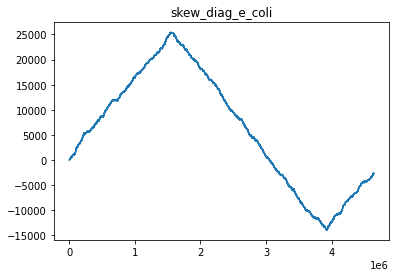

In [90]:
plt.plot(skew_diag_e_coli)
plt.title('skew_diag_e_coli')
plt.show()


In [99]:
min(skew_diag_e_coli),  np.amin(skew_diag_e_coli)

(-13919, -13919)

In [92]:
np.argmin(skew_diag_e_coli)

3923620

In [109]:
min_skew_e_coli = np.where(skew_diag_e_coli == np.amin(skew_diag_e_coli))[0]
min_skew_e_coli

array([3923620, 3923621, 3923622, 3923623])

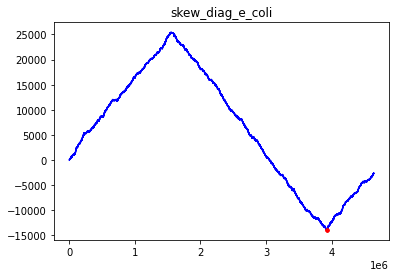

In [105]:
plt.plot(skew_diag_e_coli, '-b')
plt.plot(min_skew_e_coli, skew_diag_e_coli[min_skew_e_coli] , '.r')
plt.title('skew_diag_e_coli')
plt.show()

In [93]:
def min_skew(seq):
    skew_arr = skew_diagram(seq)
    return np.where(skew_arr == np.amin(skew_arr))[0]

In [94]:
min_skew('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT')

array([11, 24])

In [95]:
min_skew(skew_diag_e_coli)

array([      0,       1,       2, ..., 4639674, 4639675, 4639676])

In [415]:

file_path = '/Users/leongugel/Downloads/dataset_7_10.txt'
assert os.path.exists(file_path)
genome_txt = Path(file_path).read_text()

In [416]:
min_skew_arr = min_skew(genome_txt)

In [417]:
min_skew_arr

array([89487])

In [7]:
def hamming_dist(seq1, seq2):
    return (np.array(list(seq1))!=np.array(list(seq2))).sum()

In [8]:
hamming_dist('G', 'A')

1

In [428]:
seq1='GGGCCGTTGGT'
seq2='GGACCGTTGAC'

In [429]:
(np.array(list(seq1))!=np.array(list(seq2))).sum()

3

In [430]:
hamming_dist(seq1, seq2) 

3

In [431]:
seq1='GAGGGATGATACTCGAGCGCAGTGATCGTATCCGAAAAATCCGCTACCGCCATTAGTGAGCAAATTACTCTCCGTGGTTGCGCAGAGCCTGGAATACAGAGCGGCATGTTAGCGATTAATAGACTGAGAGTCCTCTGCAGAGTGAGTTTAGCCGACTTAGCAGTCAGAGCGAAAATTTAACCAAATTGAAGGTCAAAACGCGTCCACGGGGTTTGTGCTGCCTTCTCCGGTTAGAAAATAAGGGCCAAGAGATGGGCGATACAAGATTCGGCTAGTATTCGTTAGTCCCTCGGAGCCGTGAAAATCCCTGAGCCTTTCGTACAAGTCGTTCCCCGACCGATGATACGGCTTATGCATGGGTTACGGCGTAACTCCGATGGCGTAGCCAGGACCGGTTGGGTGCGTAAGGTCGCCATAGAGCGATTATACGCGCGATATCCGAGCAGGCGAAAGCCGAGCAGTCATCCTGACGACTCACTAGCCGGGTGACCGTTTTCGCTTTCGTGGTCGCATTAGAAACTGGATGATAACCTTATACGATACCTTGAGTGATTCAACTAAGAAAATCCCGATATCTACCGGCGTAGCAACTGCTGATTACCTAAGGCCGGGCCCACGTGAAGATTCTATGTTCCCGACATGCCCAAAACCCAATCTCAAGCGTGTGGGGCTATGCCTTATCGCTTGGCCCGACCTACTTATACCTCTCAGTGCGTCTCGCCTTGCTCGTCAACTCAGTTATGGGTGACGGAAATGGGTGCCTGTTTTGCTGATTTGCCGGTGACCTCTACTTATACCCCGCTTGGCAAAGGGACATTACTTGACCAACACGTGGCTACTAATCGCTAGCGAATTCATTCAGTGTGCGCTAGGGGGCATTCCTAACCGCGGCTAATAGAACGGGCGCAATCTATCAGGGCGCTTATAGGTGTCGTGTGTGAGTCAATCCCGATATAGAAATTTCCTAGAGGCCGGGGGAGCAATCAGTTCTTGAGTTTCTTTCTCAAGCCAAATTAATAAATGACCCAAACGCAGGCACCCACGTAACATATAGTTCGCAACGGAGCTTCGAGGGAGTTGTAAGTACAGAAAAC'

In [432]:
seq2='CTCCTCAAAATTCAGCTCCCACACAATACGGGTGGGTCCACCATGTGACCCGACAGTTGTAAAAGACAATTCTCCCGGATAAGCAACTCTTCAGGACAGAAGAGTCGCAGGATCACTGCCTATGGAAAAAACAGGCAATACACAGTGAGAGTGCGTTAGGAACTACCTGCTCGGCGCTCTATGGCACAGCACCACTTAGACACTTCTAACACGCTAGCGTCAAAGTCCGATTACTAGGAATCGGTAGTATTTCCGGACATGTTCCCCCATACGGCAAAGTTCACAGCTACACCTTTCATATACATGAGCCGCACCGTGGTTACGATGGGATAGACAGGCTACCCGGGTACTACTTCCGCGCCAAGAGCAATTTCTAGGTTTCGGACGTCCGCAATCCCATATAAAGGGAAGACGTTGCCTACTGCGAACTAAGGCCACACGTGAGTCATTCCTACACGTTTGCATAGTCGCAGCAGCAAACAGGAAGGAACTTATCTCGCCCGCTCTAGCTCTGTGGCCAATCAAATTTGATTTCGAGAAATTTTGACGTTGTCATTAGTTCAAATCTACGGGGATGATAGTAGCTTAAACGCGGAGATGATTGTTAGAAGGTGGTTAATGGGACCACCGCCCGGCGATGCGCGCCCAGCGCACAATGTATATTTTCTCAAGCCCAAATTACGACAAGTACTAAAGCTTCGGCTAAAGCGCCATGAAAAGAGTATTTACCACTATATGTGTGCTCGTGGCCAACGCTTGCACCGTAGTTCCACACCCGGTCCGCCCAAATGTACCTAAGCCCTTAGGGCGCGGGCGACATATAAAATGACTGCACAACTGGGGATCACGTTAGGAACCACTTCATGGATCTAACCACCTTATGGTTCCCATTTCGGCTTCTTATCCGTCGTGATCCTAACCGTTCTATGAGTGGTCTAGGGAGCATGATAGCCCTCTCCAACCATATACAAGGCCGGTAAGGGAGGCACCCGTTCGCACTCCCTGCTGGCAGTGTCACGTTTTGCTCCATCACCAGAGATAGTCGCTATGTGAGGATAAATAGGAGCTGGCCCCAGTCTCGGAGGTCCGAGTCG'

In [433]:
hamming_dist(seq1, seq2) 

828

In [193]:
def aprox_pattern_match(seq, pattern, d):
    pos = []
    size = len(seq)
    pattern_size = len(pattern)
    for i in range(size - pattern_size + 1):
        sub_seq = seq[i: i + pattern_size]
        if hamming_dist(sub_seq,pattern) <= d:
            pos.append(i)
    return pos

In [194]:
pattern='ATTCTGGA'
seq = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT'

In [195]:
' '.join(map(str, list(aprox_pattern_match(seq, pattern, 3))))

'6 7 26 27'

In [447]:
pattern='GGATCGCGCTAG'

In [448]:
seq = 'CCGTCTAGACTCACAATTATGGCAAACCGCACGCGCTGGACATCGCGGCCCACGGTAAGTATCTTCAGACTGAGCGCCCCGCGCTAAATCGGTGACTGGAGTACCACGTCGTAATAAGTTCCACCAAAACGGTAAAGCTCCTTTCTAAAGCCTAGCATGAGAGGGGAGCGCAGGAGATTCCGGCACGCATTTAATAGACAATCGCCATATATTTCCAACTAGATCGAATTGCTCTACAGATGACACAAGCGGAAGAAGGCTTCATAGGACACCCGAGTTCCGGTCTTAGTCTAGGATGACTCCTCGTGCAGTGGTTCAATTAATATCCAAGAAGCCGTTGTCACACAAATATCCGAGATCGTAGCGTTGGCTCGAAGATAATACTAGGCATCCGCTCGATCATCGCTACTTGGACTGTAGAATCGTGAGTGCTTCATGACCTCCCAACCATCATTTGTCTTTCCGATCTCTCTATGCGTTGGATTTCGGACGTGAGTCCTGTTCATTCCGCTCCAATTAATTTTAGTTAACTGGCGAATTCATGTTTAGCGAATGTTAGGAACGCTTCCACTAACTCCGCTCGAATACCAGTATTCCATATTACCGCACAAAATAGGGGAAATGAGTGCGGCGTGCTACGACCTGGGACCTTCTGGAACCCCTATTATAGTCTGCGGCTAAGGCAGCCCGCGGCTTGGGCAGTCACTTACGCCCGGGACCAAAGATGAGGAAGGTAAGCCTTTGGATCGATTATGCCGTGTACCTCATCGAATCTTCTATTCCACGTGCTGGGCCGGTAAGTGGTATCGTGCGAGTCACAGCCAATCCTAGTCGTTATAGGCCCAGCAAAAGACGTTGGTTATGGGAGCACCAAGCTTTACAATACTCAATAGGATTAAGTATATGCAACAGTCCCCGTTCGCCGTGCTTTAACTGGACCTGCGAGTTTGTAGGCGCAATTGCAAATCCCGCCGTCAGCTTGTGAGACGAGAACCCTCGACCTCCTGATCCTTACCGGAAATGATAGAGACGAACGGGGGGCAGTATGTGGCGAGAACACGTTTATTGGAGTAAAATCGGCATTCTATCGGTGCGCGCCAGAGGCGATATCGCCCTATACATGGATCAACGATGCCGCTTGGACGACTTACCCTATTTAAGCAACTGGAGCCCCACTGCGACAAATCTAGCTATATCCGTCATGGTGGTCATGAGCGGAAAAGTAAGGCCTGACGGCCTGACGTGCCACTACGAGGATTGGGTGGTCTTTGCATTGTCATGTCAGCTCGTCCGACCCTACTACTGTTTGGACAAACCCGTATGTTGCGTGTGTGAATGCTCTTTACTTCCATGAGACCATCGATTAAAACAAGGCCTTCGTTGGGCGCATCTCATAGGGTTTGCGATCAGTTCATTAGCTCAACTAATGCTTAGTACTAAATGAGTCAAGACCCGTATTGCCCCCGCAGGCCAGGAATATATGTTGTCCGACACCCGGCTTCGAGGGAGAAGAAGAAACAGCTACTGCGCACTCTCTGGCCGGACCCAGAATCATTGGGAGTTGGCAACCTTTCCGTCCGTTATCCCTTTAAATTCGGTATCTGCGACTAGGAATAATCGCAAGGACATCTCACGCATCACACCTGCTTGATTTCGCGTCGACTGAGCTCCCTTGGCGAGGCCCAGCAGGCCAAGCTGAGGAAGCTCTGGCTGACATGAGAATTGACGCATAGGATTGCTGGACACTCAGTAACTGGGCGCAACGCGTTTGTCTTACCATCTGTTGGGCCATTATGGCTAGATTCAGAGAACCATGATTAATAAGGTGCAGCCCCCTGGGTCCTGTTTAACGCGAGTGGACGTGACCACAAATGATACCTGTCTAGCTGCATTTTGCCCAAAATTGATACCCAATGCTGTTTAGGTACAATGTGGGGCTGGCAAGAACTTTTTGCGGTGAGCGTATTTCCACTAATAGACCCACCAGTTCCCATCGGCTTTAAATGTAGGAGCCGGAATGGATTTCTGCTCGATACTTGTACGCTAACTTATCGCGCTAGTAATTAGCCCAAAACTGCTATAATGTGATGACATCTTTGCCAAGGTAAGAGCAATAGTATCATTACGCGTCGGGTTGTTCACCACCCGGGGCCCCCTGTTGGCCGCCTTTCGATTCGGGCGCATTTGGAAAACGGGGCTAACTGGATTGGGTGATCCAACATGGTGGTACCATCCAGGAAACCCCCCCGCGGTAGGTGTTCCTACGCCACAGAAGTTCAGTGCTCTCTTCGAACGCCCTGATTATAACAGAGCTACGACGCGGTAACGCCTCAGCACGATCCACTGAGTTCTGTGTCCGGACGGCGTAGTATGTCCTTGCGAACTCTATCCGATCATGAAGGTCACTAGTCCCAGCACCGCTTGAAGCTCTATTATCACCCACCGTTATGACGGTATTTATTCGCACGAGGCAGGGTGCCAGTCGCTTCGTGCCTCAGCTTAGCGGGTTCCTATTTACATCCTTGCATCGTGTATCTTTATAACGACAGTCGACCTTTCAGGCATGACTTGGGGCTCCTGCGAAAACCTTGAACAATACTAACGTTCTACCAAACCAGATGAGTGAGAATAGCTGAGTGTAACGGAGGCTTTGCTTAGACACTTTAATTGTAAGGTGCACCTATTATACGTCCGCCATATCCTGAACCCGTTCATTAACCTGAGAACTATCTCCATACGCGGCGTGTGCATACGCGTACGCTTAGTATGTCCCCGCCGCGCTACGTTAGCACGGGATCGTTTGAGAAAGGTACGTCACATGCCGCGTAACGGAGTATCTGGATCATCCCTTGATAGAGTACGGATCAAATTACGATTGCATCTCAGAGTAAAGCGCCTTATGCATCGGAGGCTGCATCTCGTCTAGTAGGTAGACCGCGTTCCGGTCCTTATTTGGGTCCGTGCCATCCACACTGGTGTTATAAAGATATGGCTGTACCGTCATTGACCGACTTGATCACGTTTCCCAGTGAAGCAAGTAGAGTAACTTTATCGGAGACATCATTTCTCTATACGTCGAGCGAGTGCTTCGAATTCTGTCAGTGCCCAGACCTCGTCGAATCGGTCCTTTGTATGTGGACATTCAGCTTTTCTACTTGTGAAAGGTGTGTTTTCGGAATCGGTAGGTTTGAGACCATACTATGCCAATATGTTACGGCGGTGCTTCGGAAAGGATGATTTCCTGGATACCACCCAAACTGATGAACTGATGGACGAATCCTCGCTTCGATGGTATTCGGCCCTCTATAAATCCCCAGATAAACTGAGCCCAGTGCGGTTGTCCTATCGTCGATGCCCCGTCTTTGCAGGCAAGATAACATTTTGAAACCACCCTCAACACCCATATACTTCAGCTTACTCACGTTAAGTCTAGTTTCAGGGCGTCAAATCAGTCATTTGCAAAGCCGTTTTAAACGTTGGCGAGGGCCAGTCGAAGGCCAGACGATCCTCGCATCTGGCCGGGAATCTAAGCGTGGTGCAGGGCTACAGGAGCTTAACATCGTTGGCATAAACTTCTGACTGCCCCGGAATTTATCACCTGTACGCTGCCGCTGTGGTGGTGATACCGGATAATTGCGGTCCCCATCTAGTGCCCTTGGGATTGTCACAGGGGGCGTCGTTGGCCGCTCCGTAACCCTTTGAATCGTGAGTCATATGCGGCCTGGAGAAACCGTGCAGAACCCACATCTTCCGCGGGACTGTCGGGAGTTGTCAAGGTGCCCGGTGACTATGGTCTTCTAATGCGTCTCTGAGCGTGTAACCACGGGCCCCGCGTACCAAGCAAGCAATCTGAGTGTCTTACGGTTGACGCCACGCGCCACGACGCTGCCGACACGAAAGCTCCCGTGCTAGGATATCTCCCGGCACCACCGAGCCGGTGGCTATAGAGGCAGAGTTCATGAAGTACAGACATGACGGTACAGAAACTAACGTTACCATTTAGACGCTGTATTAGGCGGCCTAGATTTCTAGTTCGCGAAACACAGATACCGTTGTCCACCCACATTAGCTCAGGCGAGCACAAGTCGTCGGCAAACTGCTCTCAGCGTTCAGGATACTCAGCCTTTAATACGTTTGGCATACTCGGCTACCCGGGGCAAAAGGGAGAAGGAATTCCGGTCGGTAGTAAGGTTTTCGCTTACCAAAAGTTTCTGTACTTTAATGCGCAACCTTAACTTGGGGGTTGCAGAATTGACTCTAGTCTGAGCTAGATACTTCGATAGGCGTAATAATGTTTCCTTAAAGAGCCCCTGACTACAGTGAGGACAGATTCGCTCATTAACAAATTCTTCTCTAGTGTTAGGTATCCTACCAACGCCAAATGGTAATAGATTCTTTGGGGATGGCTTAGCCTATGTAGATTTCCCCCACAAACTCCAAGCTGGCCGACCAACTTTAAATGTACTACTGAATTACCTGTAGTCCGCGATTTGCTGTCTTTTATTAAGCCTATGGCCATAACTGCGGCAGGTGGAGTCGGCACAAATTAGTTAACTTCCCTTGATCCCGCCATCATATCAGAAGAAATACTTGGCAAACAGACTAACACAGGGATAATCTCGGTCATCTCATCGACCCGCGTCCCTTCTGTGGTTTTCCTTGACTCCGTGAGTACTGCCACTAGAGGTCAGGCGACATCTTACGGGGGCTCGCTAGATCCTATCGAACTACTTGTCCTATTTTAGTTTCGGGATCTCACGTACCACCCGCGTCGGTACCGGACAATTTGCCAAAGTTTAAGAGCAAGTCCCATCATGATCAGCGTGTAGATCCTGGATGTGCTGTAGGGCCGCGTTTCTATAATTGGCTCTCCCCGCTATGTGCATGAGTGCCAGACTGTTCGGTCACTTGATTCGGAAGGATCGACGATTGTGCCGAAAATGTAGGGCATCCACCTTTTATTCTCGGTATATACTTCACGTAAGAAGACAAAAAAACGAACACAAGGATAGCATTGGCAGAAAAACGCTTTACCGCACCTCTCATACGACCTAAGTCACAGAACCTTGTAGGGGCTGGGGTCTCACACATACCCTTGGAATGAAGAGCGCGCATCAGCTACTGTCTATGATACCCGTCGCCCTTACCGGTCCCTGATCTCACGGCTAGCATTAGGACAGACTGTGCCAGCATACCACCCCGGAAATAGCTAGGCGCACTTGAAATCTCGTGGCGGGCTCCCTCCTAAGGGGACTGGCTATCATTCCGCTTTCTAGTGCTGATACAATAGAACAATCTACTCGGGCGACCACACCTCGTGAAGCCCGCCCACTTGTTTGGACACACAATGGAAATAGGACTCATATGTGGATAAAGGTATTAGCCGTACGGTATGTAACGCATATAGAGGGGGCCTGATCAGGGGGAGGGCTATCCGGGGTCCGTCGTGACCCCCAGCACCCACTCACCTCCTGATCTGGGGTCTAAATGAATGCTATTTCCACTAACAAAGACTGTCTATGCTGAACAAAATCACGACTCTTACCTCGCAGTACCATCGCCTGTTCTAAGGGATTCGATGGTCAGTGTTCGAGAAAAGCTTTTGGTAGAGATTACACGAGCGGGGTACGATTGACCACTGGCCTTCGAGTTTATGGGTCACAAGTATGAGTGTTTGGTACACCAGCATGGCATATAGATCATCGATTGGGCTATAGGGTTCCACAGGTTGTGAAAAAACCGCGAGAAAAGCTGAGTCACACAGTTCGACCGGTCCAACCCATTAGACGATATTACGTCATTGTGTGGCCGGGTTTGAACTGCCCTTCGGGGTGCCTGTTTCTGCACTATAACGAAACATTGCCAGGGTCTTGCTTAGAGTCGCGTACGAGACCATATACAGAGGGACTGCTGGGTGCAGAAACGGCTGTGCCCTTGCATTGCCCTTGAAGAGTCGTTAATTTTTGTGGTATAGATTACGTCTCTTGATCCAGAACGGCACTGCGAATCCAAATTAATATTAGTACAGCTGCCTCCGTAAAAATTCTAACCTGCCGCGTGCCCGGCCGTGTGCTTCTAGGAGGACCATTAGAGTTGAGAACAGTGCTAAGTACGCGGCTAGACCTTTACCGGAGGCCCACCCGACATAACGAGGTGGCCTATTGGCCCATAAGAATGCAGTCTAGTAGGAGGGTCTGGTCGTCTTCAAGCCTTCAAGGCGTCTACGCTAGAAGTAGACTACATAGTCCAAAATGGCTAATGTCTACCTGTTCCTGAGGAGCGAGGGCGAGCTGCTTGTCTCTGACCGTCACCGCCCTCGCGAGCCGAACTTGGTGCACCTTGTAGTTAGACCGGGCACTCTTGACTTACCTTAAAGCAGTTGACGTTAATGTAGAACGGTGATCTAGTTGGGTTGGTGATTGTACACTTTGAGTGTCGGCGACACTGTGGGCTTTGCTGGTATGTATTCACCCCTCGGCCCAGTGCAGAGCACTTGTCAGCGAACGCGTTAAGAACGGTATACTGCATAAAGAAGCGGGACAAGCGACCGCTCAGGCTTGTAGAATATTCCAGCTTCAGCATATAACAATTGCTTCCTTCGCTACAAACAGGGACTTTATCCATCCGGAGCCCAAGGTTCCAGCACAATATCGATCCACCCCGACTCGTACATGGCCGCGCCACGGGTCATGATTTGTATAAGGACGGAGACAATGATAAGGTAGTTAGTACAGCTCCAATTTGTTTGTCAAAGTGATGACTCTCCTTGTTACTTTACAGCCGCCTCAAAGCGCGCCGGCGGAAAGCGCCCGCAAACTCGCGCGACCCCCTCCAGATACTCGGGTCTCCGGTATAGATCCTCACATAAGATTGGTCCGATCAGTTGTACACTGTTCACGGCTGCCGAGACATACGAGAATTACATCCCAAGCTCGTTAGCGTCTACTGTAAAACCAACCGAACTAGGCGGGACTCCATTCTTGTGTGACCTTCCCCGGCTACCAGTGCGGATTCAAGCAAGCCTACGTCAAATGCTGGGGTACACCGCAGGAGTATGGGGGTTCTCACGCAACGTAACTGATTAATTGCTCTAACGGGCGCGTCGGGAGCCGGCATCTCTAGCTGGTCCACGTTCTAGTGTATCGCAAGCCGATGTGTTGCCTTTCTTTCCAACGTTTACTCAGCCCATGCAAGGAGACGTCGAAGAGAAATCGTGCGCGCGAGGGTTTTGTAACGGCTTTCATTCTTATTCACTCAACTGCACTACAAGCTGCCCCGACTCACAGTCAGGTAGATATCGCCCGGGCGTCCATAGCTGATTGCTCGGGCACAGTCACCCCTCGCCACATACTGAACTCTTTTTTCGGATAATGACGAAGAACTACACTGCATTGCTGGTCGTTAAAAGTTCAAGCTGCAACCAGTGGTTATGCACCGGACGGCTTAAGTTTTTGGGTATATCGATTGTTCCCTCGCGGTCCGACGAATGGGTGATTACTCAAGGCTGTGTATTGTGCTATTTTGTACTCACTTGCAATTTCGCAACACACTTGGGGTGTTGCTGGCCCAAATTTTTAGTGGTACCTGAGCGCGCGACCAGATTGTCTGTCGCTTAACCGTACGGCACCGATAATGAAAGTTCGTGACCGTGAAACGTAGCCGCGCGGTCCATTGAGCGAAATTAGCTAAGACACCTTGGAGATCGACGTAGCATCTCTGAGGCTGAACCGGTTAGTCCTTCCTGTGTATGTTTGTCAACTACTGGAGGATGTGTTTTAATCAATGTTGATAGGCCAAAATAGACGTAGTATTTCCTGTATGGGCGCCCAAGACCCGCAATGCCCAGTGGAGAGTTAGGCACGAGTGGGCTTTACAGATGGTTTTGTGGTTCTGCTTGTTCCGTCGACCGCCATGGACTAGATTATCAGTAACACCACCTTTTGCGACGGCCATTATATTACAGAGACAAATCCGCGGACCTAGGTCCTAGGGGGGTCAGTCTAGTATTGGCTGTAGTCAGGAGCACCAGGCAACGAGGTTCTCGGGGCATAGTACGGTTTATGTAATGACCCTTTGTCACCGGATGTATCTTCTCTGCACCACGAGTTGATTCATTTTGACAACCCTATCGAGTGTAACAATTTAAGAAGAATTGTGAAGTGCAGCCCTCACGTTTCTAATCCTTTCATCGATGACTCACTACATCTGGGTATCCACGAGCGGGGGTCTCACCCTTGCTGCCTGACATCCAGTGTCGAATGCTACCCGGTCAAACCACCCGAGAACAAGAAAAGAATCGTTGGCTTCAGGGAACGATAACGAATGCGACCGCTAGGGCGAGTAAGTTTGCAGCTGTAGTGCACCTCTCGATCGTCTGACACCCTCTGCCGGAGTCATACCGACCACCAGATTTGCACTCTAGTGAATAGTGACCGAGGACAAGTGCGTCGCGCCTGTTAATTTTGTGTTTGTGGAATATGTAGCATTACCATAAAGGATCGTCCATCACGCAAGCTCCGGTAATAATATGAATGCGGATGGCATCATTCCCTGGGCGTGTATTATGAAGCAACAAGCAAGTTCCCAACTTGCTTTGATGCTCCCGGCGGCGCAATTTCTATCTCGAGCTCTTGGTGCAATTGCTTTTGTCAACGAGAGGTGTTAAGCGGAGTATGTTGATTCTGTCAAGTCTACCGACGAGAATGCGTTCAATTCAACGCGATTCTGCGGCGTTGGCACAGCGTATAACCTAGCGGTCCTAGTGAGCCCCATTGACAGTTGGTGACGTCCAAATCGTCCCAGGTCAAATTCGGGCTCGATGCGTGTGGTCAGGGCGCGCGATTTGCGTCGACCATTGCAGGTTGCAGCATCAAGTGATCAGCACTGCCGCAGCTTCTATAGAGGTCATCTATTGTTAGCAATCGATAAGCAGTCGAATAGAGGCAGAAACTCTGACCCGGAATGTAACCACGCTTTATACAAATTCCGGCGGACTTACCTTCTCTACGCGTACTCGGCAGTTTTCCCTAGATAGGCCCTGATACAGCGCAAACGCACCGCCTCGGCGAGGGTGCGCGATTCTTAAGAATTAATATTCTAGTTGCGCCGGACTGATGCTTAAAGGGCTGGCAGACGTGGCGATTTGCTTAAGGAAACATTTTTTGAGCTGGCTAAGATAACGTCGCGGCATCGGCCGTGCAATATATACGCGGCAACCGGAAAGAGGTGCCCACATTACGCATCTGCATCGTAGTACTGCTACGTGTGTGAGAGTCCCAGACTTCAGAATTTGGGTTACATTCGCAACACCGGAAGTTAGAACTAACCCGTTTGGTAAGTCGTTTATGTATTATCTCGCGGAGATTGGGCATAGTACAAGAGGTTGGATGAACACAGTCTTCCAACATTCGAGAGACATATGAGTGCACACCGGTTCCATCAGGCGCGCACATGATCCGTTTATGACCCCCAGCACTACTGAGGAGCTAGATGTGGCCGACAATTAGGTTCAGTTGCGGCATGACGAACCTTAGCAGGGAATGAGGCTACCTCATCCAGCTTTCGTAGCCCTGCATTCCTACCGCTATTATGCGGCTTTATTCCAGGTCTCACACGTTCGAGAGCTGGCCATCAGTCAGCCACGTTCGGCATTCATGGCCCAGCACCCGCAACTGAAGATTCTCACTGGGGATAAACCCTCGGTAAATTAAGTGCAAGGATTCCCGTATTGAAACTGTAACGGCTGCGGACGAACGGTAATTCCACTGTCCGATATCATCAGGCGCTTACTGGGCGGGGCCAAATAAACGTTGCATCACTTGTGTTTAGGCCGCTTCACCAGTATTTGTGTAAGCGTACACATGGCCATAATTTTTAGGAGTAGGGGGGGGGAGAAAATTCTTAGGCCACAAAAGCCAAGGAGCGTGCACACTTGCCGTGCATATTACGATCGCCGAGTTGGGAAATATCCTTTACCCTGGGACGTACAATTTCCTCTAACGTGTTCGATACAACAAACCAGATGAGAATTTCTGTTCCGCGGTGGTTACGCCTCTCGTCCCGCTTATCACGGCATGGTCGGGCACGAGTGTACTCGTGCATATCCCAAGGAATAAGATTCGCCCCTCACATTACCAGCGCTTAGCCGCAGAATTCTCAATGCGAGTCTGTCCAGGTGTTGAATGAATGGACTTGGTCGTGTGCTAGGGACGCGAATGGTACCCCTTTGATGATGGGAGGCTCGCAACCCCATAAATCCTGGGGCGCATAAGGGCGATAAAGGGGTGCTGCTCTAATTCCTCGATAAAGTAGGATGGCAGGAGGGACGTATACTACAGACCACCTCTGGCCATAAGATGGTTAGTCAAGGTTTATGGCTTAATACAGAGGATCTTCCGGTGTAAGCTCTGGCGTATGGATTTAAAATTCACACAGGTACTACGCGAGGCGTCAGAATAACCGGCACTGAAATTTACAAGCAATACCCCATCAGGACGAATGCGCCCAGGTTCGAGGTCGACGAAATACATTGTCGAGTATTCCCCCAGTCTTGCATTTGCTTAGCTTAGTCAGACGGGCCAATAGTGCTAAATGATCTAGACTCTAGGGAGCTACCTTCACGAACCCACAAAACCGCGGGTTAGGCACGCAGGGGGCTTAATCACTGCCGCACGCTCGGTGGCAGACAGCAGCAAATCACCTTTGCGTACGCGTCTATTTGAAAGGACCTAAACTTGCTATGTAGGCACCCCCCGGAGGCGAGCGAAGAGAGGTATAACGGCGACCCATGACATGGATGTATTGATAAATATAATAATCGCGTACTAAGAATGTGGTGCAGGTAGTTGATGGTAAGGGTTCACATCCGTACCAAGAGAGTTTGCACCGTTGGCAGACAGAGTATCACGATCCCCTTATACTGCATGTAACGGACAAAACGTCCCACTGACTTCGGGTAAAGCGACCTTAGTACGCTTACCCGACGACCTTTAATAATCGGTGGGCTAGGGTACTGGCACCAACCCTGACTGTATTTTGGGTAGTGTGTGGTGGATCTGATACACGCAGATAAATAAATCCGTTACAGAATCGCGTATTTACGTCTACACTTGTGCACGGGATCAGAACGCAATATCTTATCATGCAGGCTTTTTTGGCTGTTATTACCGTTTTCGGGAAACGCGAGTGGGTAACTCTGCATTGTGTTAGTCACACAAGGCTTGCTACTAAAACCCTAGATCGGTCTTTCGGGCTCATACAGCCGCGAATACTGGGAGCTCCGCCTGTGGCAGTAGCCTCGACTGGAGTTAGTGGAGAGCTGCATCGGCTGGTGGATTCACTCTATTTTCGTTAGCTGTCATCCTGAAAGTGTTGGGACGTCCTTCTTAGCGTGTCACGTTACCATATCACCCCGTCCTAGTGAACTCGGCGGGCGGCCGGAGTCTCACTGTCTGAAACACTAAGCTTTCAAGATATGGAGTTCACCGTTGGATGGTCCGAAGATGGGCGGACTAAAACTGAATGTCCCTGGCCCGTCCGAAGTTTACCTCGCGTCGTAAGGTTTGGTGGGAGTAGAATGTTATCCCGTTTCCATAGTTCCAAAACAGGTTATAGGAGGTGTATAGCGGTCCCCTTTCATACCCGAACGCCGAGTCTGCCTGAGTTCTAGACCTACTTGACTAGGTCCGGGCATTGTCTGGTAGGCCACTGACGTAGAAAAGCATGGATGCAGTGCTTTCCCCAAGGGCATTCACTCGTCGTGAGGGGTGTTCGTCGTACACTAGCGGAAGGCAAGTGGCCCTTCAATCTTGACGCGCTTATCCTGAGCATACCTCTTCGCAGTCACTGGCTTAGACTCACAGAAGTTTGCGTAGTGAGCTTTTGAATAGACTTACGGGTCATCCCGACCGGCGTGAAGCGGTCTCTAACAGTGTACAGGCTCATCGAAGAGAAGCACCCATCTGGGGTTTTGGATTTGGCAGCAGAACCGAAAGACTGTACTGGTACATGGGAAACTGCCGCCTGGTCATTTAATACGTACGATGCGAGGGATCCCCTATATAACCGTTCGTTTCTGTTTTGAGACTTGTCAGCCCCCACGACCTGTCTAAATCGTTCCAGAGCTCAGATGGAGAGCAAATACCGAGCGGGGAAATCCTAAATGTACCGTGACTGACGGGTGACGTTGTCAGCTGCACATAAGCGACTCGACCGATTATTCCAAAATCTGAGAGTTAACAGGGTACGTTTTTCCCGTCCAAGCTTGCGATACTAAGGGGTTGTAGAACATCTAAGCGTTCGTCACAATCCTCAGTTATAGGCTTTTTTTAAGGCAAACAAATTGTTAAGAGTATGCGCGCAGTCTTGCATAAATAGGTGACCGTTCCGATGAGAGCTGTCCGCCCTCCAACTCATCGCGTCTAGGTATTTGCGCTATCTGCACCCAACGACCTGAGGACGCGTTCTGTTGATCTTATGTTGTAAAGTGTTGAAGATGGAACTTTACAGTCCGAAGGAGCCAGACGTTGCGGGTTCGAGAGAATACTTATCCCTAACGAAACAAAAAGGACCCTAGGTGTGGTAGTAAGGGCGGATACGTTCGCTTACAACGCGCCTCTTCAGCAGACCCCGGACGAAACCTACGCACTCATCACAATTTGGACCCAAGATCACGATCGCAGGCGAGTGGCGGGCTAATATGCGTTGTCAGATCTATTCTGGGGAGGATAGGATTTCCGGGGTAAGACCCGGCCTGCGGCGCCTTGAATTACGAAATACGATGTTGCACAACCGCTGGGTCGGGGCCGGGTATGTCCAAAGCCGATATAATCGATATCCCCTTACTAATCCTGGCACCGAACCATTCAGTTGGTAGGTCATTTGATATGTTCCCACTTGAGTCGCGCAAAAGTCCGAGCCAGCAACTTCAGGCTTTGGAGGGAGGGCATCCCAGATCCCAAATTGTTAGCTTCTTCTTAACACCAAACGCTATGAATAAGCCACGAGTTTTCAGCCCACACTGAGCGGTCCACCTGACCCACTGTTGCGCGCGAGGTAATCGCGATATTACGACACACGAGACTATAGGCTTGCAGCAGGGCGTTAATCTAGGTAACCTCCGCAGCAGTCTAGAAGCCAGAACTACTAGGATCCAAGCTTATAAACCCAGTTGTTCACATGGCAACTAGGACGCTACGTTTTGACGCACATTGCTAGTTGTCAAGCACTCCGGGATGTCCCTGGGCTCGAATTTGGTCCGGCTCTCACTGAGGTTATACATAATGACGCATTCTCTGTGTGCGTCATCGGAACTTTCCTGTTCTGTAATTTGAAGGTCCCATAGAAAGACTAGCGGATCCTGTCGAGTCCTACGTATCGTACGCATCCTGGCCATCCGCGCAGGACCTGAGCTACGCGAGGCCAGTTGGAAGGTGGGTCCGGTAGGTTACAACTAGGTGGCTGTTGTTGTGTTCTAGTACCTGACGCATCTTGAACGTCACTCTATAACAACAATGGCGACGCCCCCATGAGGGTAGGGGCAATCCAAACCCAAGGGCGTCTCGTATCGCTTAGCATTGGCGGGCCGTAGGAAGTGACGTGCGGATCTAGCGAAGCCAGGCCACTAACTGACGCATGATATAACTAGGCACGCGCCTCCGGACCAAACCGTGGTTTCTGCCCCCTGGTGGTAAAATGATTGTTTGCGTTCGTCGTGCCTAGCATATTGTATGCGAAGGGAGTCGACTCAACGGACTTGAATGCACCGTACCAACTTAAGGCTCCCGTTGAGGGGGGGGTATACGCCGCTATGCTAGCTTCGCGTACGTGGGTAGTTAGGGATTATGGGGTTCTCCGCAGACCAGACACTAACTGAGACGTTGGCACACAGATTAGCGATACACCTTTAAGAGGGGGACTAACCGGTATGTTGTGCCATCGCGTCTCATACGTCCTCTATCTGTTGCGAGCCAAGATGGAGCGCCTATGTCGAAGCTTCACGCTGCGATACGTCCAATTTGGAATTTATTGTTCACCCTCTCTGGATATAACAGGATGTTGTGGCCGGCCTGCCACTTCCTGGTTTGGCCAGGAGTTCACTGAATGGGCCGGCATTACTGGGCGGGCTAAATCCTTGCCTTCTGTTGATTGATATAAAGCCCGTTCCCTGCGCAGTGACTGATCAACGAGCGTGACTCGTCTTAACCCAAGGACTTTGAGTTGGACTTCGTCAGAGCTTGCCCTAGCCTCGGGTGTATTATAGGGGCAGAAGCACTTGCCAGGACCGTCAAAGCGGCATAGCAATCGATGTCGAGGCGTCCCTGGGTTTCTACCGCCTCGGGTTATGAGTTCCTCCATGAGTGGCTGTGCCACTGAGGTAACCAGCCACTGGGCCCGCGGGAACATCCAGGCGGGGACGATTATTCCGGTCTGCCCGTACTCCCGAAGCCCGGAGTTACCGACGTCAAGAGTCTGCGAGCAAATATTGGTCTCATTAACATCTAGCATTGTACTACCGCGAGGTTCTTGCCGACGCGCTTGTTATTATTTCTCGCGTACGAGATATTCTACACTGCGGACGCCGCAGTCCGGTTCCCGCGAACTAGGCGGCGAAAGGCAAAGCATACTCAAATTAGCGTAGTCAACAGGGTTATGTAAATAAAGGGGTGCCCGGTCGTGACAACGCTGAATGCGTTCTCTAAGATCTCTTCTCTTGAATTCGTGCATACCACCGTGCCCACATCTCGGCAACGACTGTGCTATAATTCGCTAATAACTAGTGCTAGTCCGATCCCTCCCATCGGTCTTTGAACTAATAATCGGGGATAACGGTCAAGCCTAATCTGTATTGGTGAACGTTAGCGGTCGGGTGACCCGGGCGCGGATTGATTCTAGCGCCGCCGGACATCCTTTCGTTTAAGGGTCTGGGATCATCGATGAACGTACGAAGGTAGAGGAACGAAAAGCCAGTCAGTCTAGCCATGGGGCAGTTATTAGCGTTCCTTTTGAATCTAGGATGAGTCGAGACTTGTTAACCCAATATCGGATGTCCACCGGCCGTCATCGCAGAACTCCATTATTAATACCTTTGACAATCGTCAAGCCAAGATCGGCTCTGAGTGGTTAGAGGACTGTCGGGTAGGATAAGGAATGAACGTGCGTGTCGGGCGGTCGCGCCTGATAACCATTTGTATATCAAATAAGTCAATACACTTGCGTGATGTTTAGCGCTCATGAAACGGATCTTAGTTCAATCCCGGTCGCGATTAAAAAATTGCAGTCAGGCTCTATACAGTGGCAGTGTGGGGCATTTTTTATTTGGGTCCCACGGCACGATCGCGACCGGCGACCCAGCTTCTCGCTGTTTAGAACTACCAAGGACCGTTAACGCCAGCATGAGATGACTGGTGTATACACTTCATTCCTAATACAGCCTTCAATCGCCGAGAATAAAGAGAATATAGCTTGAGCGCCAGGACCACGCATAAAGCGATTATAAACTAGGAAAGTAAAAGTGCTAACCCCGCGCATTCATTATGCACAGACTGTGAAGAGTCTGATGTGTAGCAACCCCACGCCGTCACGCTTTACATCTCGCATTCCTTTCCAGCGACAGTGAGCGATCAATCCACTAGAAACTCGCTCCCAAACTCGACAATGCCTCCCGTTATTAAGCATACAGTGACCTCGACGTACATCTGGTACATTGATGCGATTTGGCGGCTGTCCTGCTCGTGGATCCGTAGCACCATAGTCCCTGCGAAATTTCTGTCTCTGCGATGTGGGGAGTATTGGACAGTCTGCCTCGTCACGACCAGGCTATCCCATTGGTTCCGGACCGCGGAGAAGATGTTTGATCCTGTCTAGCAAGGCAGTGGAAAAGTCCGAACATGGGCTCTGATTCAGCATCCCTTTCAAGCCTATCATTTCATGACACTGTACGTTATAGTACAAATACGGCTTTTGACCCCGATAACGTCGAGAATTTCACCTAACCTCGCACCGTAAGTCTGTGATAGCTTCGGAGACGCAAAAATAAGCTAAGGTGACGATAACTATATAAATCAGCAGGCCCGCCCCGGGGGTTCCCATGTACTTGATAGGTAACGTTTTAGCCATATGTTCATATAATGTGCGAGAACACATAGTCCTCACGCTAGAATTGGCCCAACAGAGCCTACACGCCCGTCAGTGGTTTAATTGTTGTTTCATTATTATCGTCCCAACATCTCTGCGTTCAGGCACACGCTTTGCCGCTTCTTGGGATGCGGTGGTAAATAATTTAGGAATACCAATTTGATCACTCGTTTCTGGAGGTTCAGGGCGTACCGAAGTTATTCACGTCGGATACCGACCGCCTTGCTATCAGATCTGCTCTGCCAGGTAATTCCGCCCGGGTCGGTTTGAAACTCGTGTCGGCAATACTATAGACGGTCTGGATATCCTATGGCTGTATAGAGCTCTCAGCGGGCCCTGTCAGGGTCCCTCGCAAGGTTTTGGGCAAATCGAACTGGACTGGCCCCGGGATGAGCAATTCGTTGCACTAAGCGGTATCTCAACTCGGACACGTCGTCAGTTAGGAAGTGGATTACTTCCCCTGCAACCATTTAACGTTCGTCCAGGACCGGTTCTCGCTGGCACCTGAATCCGTGGGGCTATTTCAATTCGGTCGGGGGAACAGTTTCAAGTTCGACTCGTATAGCTTCGCCATGAAATGATACTCTGGAATCGACCGGGGTTCGCGATGCTGTCTCAGCATCTTGGGCGTGGTTACTACTCCATCTCTACATACCTGGCGTGGGTTACGCATGCTTAGTTGTGCCACCATCTGGCCATCTCGTTTTTCACAGGTGCATGTATGAAATGAATAGATAGGTCAGCACGGGACATAGCAGGTAACATCTCAGGAATTATTGAGGACTTGTAGTTTAGTGTAGATGTACATATTGCGCATTTTATTTGGTTCGACTATGTTTTGTTCCAGGCTGTTCTAGACTTCTTTATAGCTTTCACCGATCGAAGGATATTGGACTTCCTCTTTATCACTTGCACAGCTCCGAGGCCGTCTGATGGGATGTCAATTAGCTTATTTTGACATAGCTCAAATACTACGAGTAGGTAAATATGCTACGGCTCGCCCAGTACCCCAGTCTGGCGGTTAGAAAAGCTTGAAGCCCACCCCTGGTCGCAGGATCGCGCTAG'

In [449]:
' '.join(map(str, list(aprox_pattern_match(seq, pattern, 4))))

'27 75 164 225 463 803 1089 1106 1129 1759 2048 2793 4561 4704 5006 5163 5201 5703 5936 6500 6800 7212 7508 7585 7699 7992 8444 8502 10310 10506 11196 12665 12896 13041 13054 13230 13600 14231 14587 15165 15330 16145 16623 16733 17187'

In [462]:
file_path = '/Users/leongugel/Downloads/dataset_9_4_1.txt'
assert os.path.exists(file_path)
file1 = open(file_path, 'r')
Lines = file1.readlines()
pattern = Lines[0].strip()
seq  = Lines[1].strip()
d= int(Lines[2].strip())

In [464]:
pattern

'AGAGGGTGTAA'

In [471]:
d

5

In [467]:
' '.join(map(str, list(aprox_pattern_match(seq, pattern, d))))

'16 19 39 94 95 97 116 138 192 226 243 269 382 385 421 460 621 628 641 672 688 720 722 795 838 850 852 879 907 909 1006 1028 1061 1063 1071 1073 1076 1093 1105 1107 1115 1129 1131 1196 1211 1224 1225 1264 1268 1271 1331 1386 1388 1412 1427 1453 1460 1462 1517 1580 1589 1617 1628 1722 1767 1795 1827 1887 1889 1931 1965 2064 2066 2070 2084 2119 2123 2143 2152 2237 2271 2336 2361 2369 2401 2444 2464 2476 2511 2552 2564 2566 2617 2651 2679 2736 2738 2822 2844 2846 2858 2868 2908 2953 2992 3067 3069 3100 3102 3131 3139 3141 3171 3187 3239 3259 3303 3357 3463 3470 3585 3617 3620 3622 3634 3636 3643 3660 3758 3760 3790 3887 3909 3919 3959 3961 3987 4000 4018 4170 4172 4182 4186 4195 4197 4206 4233 4239 4286 4315 4374 4384 4444 4446 4447 4463 4484 4543 4607 4609 4627 4646 4656 4679 4753 4849 4886 4964 4972 4981 4983 5009 5011 5038 5107 5110 5114 5121 5208 5231 5252 5277 5297 5299 5315 5411 5429 5440 5474 5490 5533 5556 5564 5570 5576 5578 5596 5652 5704 5727 5750 5762 5984 6011 6013 6023 6026 

In [470]:
len(aprox_pattern_match('AACAAGCTGATAAACATTTAAAGAG', 'AAAAA', 2))

11

In [472]:
file_path = '/Users/leongugel/Downloads/dataset_9_6.txt'
assert os.path.exists(file_path)
file1 = open(file_path, 'r')
Lines = file1.readlines()
pattern = Lines[0].strip()
seq  = Lines[1].strip()
d= int(Lines[2].strip())

In [473]:
d, seq

(2,
 'TCAGTTAATTCATAAATTGCAGGACGTATACGGGTGAGGCAGGTGAGACAATCTTCTCATCAAGCGTGCCACTTTTACAGAAGATGTAGAACTAACTAGGGAGGGCTTTAAGTCCCTCGTAATCGGAAGCGACTCTATGACAAGGAGACTATAAAACGACATAAGTACGATCCCGTTAGCGTCAATATGCAAATTGAAAGGAGTCATGGAAAGAGATAGTCTCACAAGTCGGGAGACCTTACAAACATAGTCCGCACTAGCTCGTTAAGAAGACACATAGTAAAGCTCGATGGTATTCTTCAACCCCCGTGTAATACATCCATTTTCT')

In [474]:
len(aprox_pattern_match(seq, pattern, d))

44

In [478]:
'TCAGT'[1:] + 'A'

'CAGTA'

In [27]:
nuclotiods = ['A', 'C', 'G', 'T']
suffix = lambda pattern: pattern[1:]
def get_neighbors(pattern, d):
#     print(f'pattern: {pattern}, d: {d}')
    if d == 0:
        return pattern
    if len(pattern) == 1:
        return nuclotiods
    neighbors = []
    suffix_nghbt = get_neighbors(suffix(pattern), d)
    for text in suffix_nghbt:
        dit_suff = hamming_dist(suffix(pattern), text)
        if dit_suff < d:
            for x in nuclotiods:
                nghbt_item = x+text
                neighbors.append(nghbt_item)
        else:
            nghbt_item = pattern[0] + text
            neighbors.append(nghbt_item)
    return neighbors 

In [30]:
neighbors= get_neighbors('ACG', 1)

In [34]:
neighbors

['ACA', 'ACC', 'AAG', 'ACG', 'CCG', 'GCG', 'TCG', 'AGG', 'ATG', 'ACT']

In [31]:
neighbors1 = ['CCG', 'TCG', 'GCG', 'AAG', 'ATG', 'AGG', 'ACA', 'ACC', 'ACT', 'ACG']

In [33]:
set(neighbors1) == set(neighbors)

True

In [41]:
neighbors1_lines = get_neighbors('TATGGTGAG', 2)

In [42]:
with open('/Users/leongugel/Downloads/neighbors1_line.txt', 'w') as f:
#     f.writelines(neighbors1_lines)
    f.write('\n'.join(neighbors1_lines))

In [78]:
def count_kmers_with_mismatches(seq, k_size, d, with_reverse = False):
    freq_map = {}
    size = len(seq)
    for i in range(size - k_size + 1):
        pattern = seq[i: i + k_size]
        neighborhood = get_neighbors(pattern, d)
        if with_reverse:
            neighborhood_rev = get_neighbors(rev_compl_fast(pattern), d)
            neighborhood += neighborhood_rev
        for neighbor in neighborhood:
            if neighbor in freq_map:
                freq_map[neighbor] += 1
            else:
                freq_map[neighbor] = 1
    return freq_map

In [76]:
def freq_words_with_mismatches(seq, k_size, d, with_reverse = False):
    freq_map = count_kmers_with_mismatches(seq, k_size, d, with_reverse=with_reverse)
    max_count = max(freq_map.values())
    patterns = {k: v for k, v in freq_map.items() if v == max_count}
    return patterns

In [52]:
count_kmers_with_mismatches('TTTAGA', 3, 2)

{'TAA': 4,
 'TCA': 4,
 'TGA': 4,
 'ATA': 3,
 'CTA': 3,
 'GTA': 3,
 'TTA': 4,
 'TAC': 3,
 'TCC': 3,
 'TGC': 4,
 'ATC': 3,
 'CTC': 2,
 'GTC': 2,
 'TTC': 3,
 'TAG': 3,
 'TCG': 3,
 'TGG': 4,
 'ATG': 4,
 'CTG': 3,
 'GTG': 3,
 'TTG': 3,
 'AAT': 3,
 'CAT': 2,
 'GAT': 2,
 'TAT': 3,
 'ACT': 2,
 'CCT': 1,
 'GCT': 1,
 'TCT': 3,
 'AGT': 2,
 'CGT': 2,
 'GGT': 2,
 'TGT': 4,
 'ATT': 3,
 'CTT': 2,
 'GTT': 2,
 'TTT': 3,
 'AAA': 3,
 'CAA': 3,
 'GAA': 3,
 'ACA': 2,
 'CCA': 2,
 'GCA': 2,
 'AGA': 2,
 'CGA': 2,
 'GGA': 2,
 'AAC': 2,
 'CAC': 1,
 'GAC': 1,
 'AAG': 2,
 'CAG': 1,
 'GAG': 1,
 'ACG': 2,
 'CCG': 1,
 'GCG': 1,
 'AGG': 2,
 'CGG': 2,
 'GGG': 2,
 'ACC': 1,
 'AGC': 1,
 'CGC': 1,
 'GGC': 1}

In [55]:
freq_words_with_mismatches('TTTAGA', 3, 2)

{'TAA': 4,
 'TCA': 4,
 'TGA': 4,
 'TTA': 4,
 'TGC': 4,
 'TGG': 4,
 'ATG': 4,
 'TGT': 4}

In [56]:
seq='GTACCTGCCGAGATGTACGTACATTGGATGATGTACCTGGTACCCGACTGCTGCTGATTGCCGAATTGCTGCTGCCGACCGACCGACTGCCGAGATATTGCTGGTACGTACCCGAGATATTGCTGCCGAGATATTGCCGACCGAGTACGATGATCTGATTGATTGCTGCTGGATCCGAGATCTGATTGGATGTACCTGGTACCCGAATTGCTGGTACGTACGATCCGAGATATTGATTGATTGGTACCCGAGATCTGGTACCTGCCGACTGGTACATTGGTACATTGCCGACTGATTGCCGACCGACTGATTGATTGCCGACTGCTGGATCCGAATTGGATATTGCCGAGATATTGGTACCTGCCGACCGA'

In [57]:
freq_words_with_mismatches(seq,5, 2)

{'TACTG': 80}

In [80]:
freq_words_with_mismatches('ACGTTGCATGTCGCATGATGCATGAGAGCT', 4, 1, True)

{'ACAT': 9, 'ATGT': 9}

In [82]:
seq = 'CAGTGCACGGTCGTGGTCCGGTCCAGTGTGTGCACACAGTGCACGGTGGTCTGCACACATGCGGTGTGTGGTCGTGTGTGCGGTCCGCGGTGGTCGTCCGGTGTGCGTGGTGGTCCGCACGCGCACACATGGTGGTCCGGTGCGCATGCACATGCACGCGTGGTCCATGCACATGCGTGGTGTGCAGTCGTGCGCGCGCACAGTGTGGTCGTGGTCTGCGCGGTC'

In [84]:
freq_words_with_mismatches(seq, 7, 2, True).keys()

dict_keys(['CGTGCGC', 'GCGCACG'])

In [172]:
min_skew_e_coli[0]==3923620

True

In [162]:
freq_words_e_coli = freq_words_with_mismatches(genome_e_coli[min_skew_e_coli[0]: min_skew_e_coli[0] +500], 9, 1, True)


In [169]:
freq_words_with_mismatches(genome_e_coli[min_skew_e_coli[0]: min_skew_e_coli[0] +500], 9, 1, True)['TGTGGATAA']

4

In [163]:
freq_words_e_coli

{'AATGATCCG': 4,
 'AAGGATCCT': 4,
 'CGGATCATT': 4,
 'AGGATCCTT': 4,
 'TCTGGATAA': 4,
 'TTATCCAGA': 4,
 'AGCTGGGAT': 4,
 'ATCCCAGCT': 4,
 'GCTGGGATC': 4,
 'GATCCCAGC': 4,
 'CTGGGATCA': 4,
 'TGATCCCAG': 4,
 'GGATCCTGG': 4,
 'CCAGGATCC': 4,
 'CAGAAGATC': 4,
 'GATCTTCTG': 4,
 'AGATCTCTT': 4,
 'AAGAGATCT': 4,
 'TGTGAATAA': 4,
 'TGTGGATAA': 4,
 'TTATCCACA': 4,
 'TTATTCACA': 4,
 'GTGGATAAC': 4,
 'GTTATCCAC': 4,
 'TGGATAACC': 4,
 'GGTTATCCA': 4,
 'AGGATCAAC': 4,
 'GTTGATCCT': 4,
 'AGAACAACA': 4,
 'TGATCAACA': 4,
 'TGTTGATCA': 4,
 'TGTTGTTCT': 4,
 'GATCAACAG': 4,
 'CTGTTGATC': 4}

In [165]:
patterns_pos_e_coli = []
for pattern in freq_words_e_coli.keys():
    patterns_pos_e_coli += pattern_match(genome_e_coli[min_skew_e_coli[0]: min_skew_e_coli[0] +500], pattern) 

In [166]:
patterns_pos_e_coli

[288, 289, 436, 290, 124, 203, 383, 204, 382]

In [168]:
genome_e_coli[min(patterns_pos_e_coli): min(patterns_pos_e_coli) +9]

'TAAATACTT'

In [124]:
file_path = '/Users/leongugel/Downloads/Salmonella_enterica.txt'
assert os.path.exists(file_path)
file1 = open(file_path, 'r')
Lines = file1.readlines()
salmonella_enterica_genome  = ''.join([line.strip() for line in Lines[1:]])

In [126]:
len(salmonella_enterica_genome)

4809037

In [127]:
skew_diagram_salmonela =  skew_diagram(salmonella_enterica_genome)
   

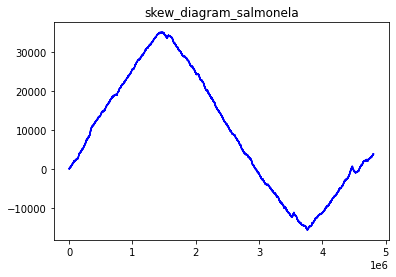

In [128]:
plt.plot(skew_diagram_salmonela, '-b')
# plt.plot(min_skew_e_coli, skew_diag_e_coli[min_skew_e_coli] , '.r')
plt.title('skew_diagram_salmonela')
plt.show()

In [132]:
skew_diagram_salmonela_min = np.where(skew_diagram_salmonela == min(skew_diagram_salmonela))[0]

In [178]:
skew_diagram_salmonela_min[0]

3764856

In [173]:
skew_diagram_salmonela_min_L500 = skew_diagram_salmonela[skew_diagram_salmonela_min[0]-500: skew_diagram_salmonela_min[0] +500]

In [179]:
salmonella_enterica_genome_skewmin_L500 = salmonella_enterica_genome[skew_diagram_salmonela_min[0]-500: skew_diagram_salmonela_min[0] +500]

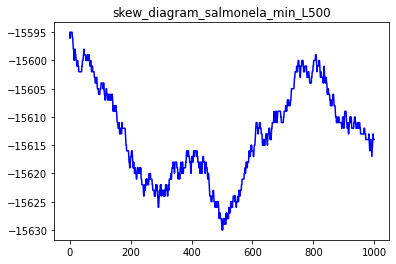

In [175]:
plt.plot(skew_diagram_salmonela_min_L500, '-b')
# plt.plot(min_skew_e_coli, skew_diag_e_coli[min_skew_e_coli] , '.r')
plt.title('skew_diagram_salmonela_min_L500')
plt.show()

In [180]:
kmears_salmonela = freq_words_with_mismatches(salmonella_enterica_genome_skewmin_L500, 9, 1, True)

In [181]:
kmears_salmonela

{'TTATCCACA': 6, 'TGTGGATAA': 6}

In [ ]:
'TTATCCACA'

In [182]:
patterns_pos_salmena = []
for pattern in kmears_salmonela.keys():
    patterns_pos_salmena += pattern_match(salmonella_enterica_genome_skewmin_L500, pattern) 

In [183]:
patterns_pos_salmena

[903, 723]

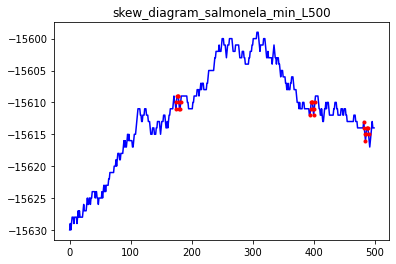

In [160]:
plt.plot(skew_diagram_salmonela_min_L500, '-b')
for pos in patterns_pos_salmena:
    plt.plot(range(pos, pos + 9), skew_diagram_salmonela_min_L500[pos: pos + 9] , '.r')
plt.title('skew_diagram_salmonela_min_L500')
plt.show()

In [155]:
len(range(pos, pos + 500))

500

In [157]:
len(skew_diagram_salmonela_min_L500[pos: pos + 500])

18

In [159]:
pos, pos + 500

482

In [184]:
hamming_dist('TGACCCGTTATGCTCGAGTTCGGTCAGAGCGTCATTGCGAGTAGTCGTTTGCTTTCTCAAACTCC', 'GAGCGATTAAGCGTGACAGCCCCAGGGAACCCACAAAACGTGATCGCAGTCCATCCGATCATACA')

50

In [188]:
np.where(skew_diagram('GCATACACTTCCCAGTAGGTACTG')==skew_diagram('GCATACACTTCCCAGTAGGTACTG').max())

(array([1]),)

In [189]:
skew_diagram('GCATACACTTCCCAGTAGGTACTG')

array([ 0,  1,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -4, -5, -5, -4, -4,
       -4, -3, -2, -2, -2, -3, -3, -2], dtype=int32)

In [196]:
aprox_pattern_match('CGTGACAGTGTATGGGCATCTTT', 'TGT', 1)

[0, 2, 6, 8, 10, 12, 18, 20]

In [197]:
len(aprox_pattern_match('CGTGACAGTGTATGGGCATCTTT', 'TGT', 1))

8

In [200]:
len(get_neighbors('CCAGTCAATG', 1))

31

In [201]:
len(set(get_neighbors('CCAGTCAATG', 1)))

31

In [202]:
np.array(get_neighbors('CCAGTCAATG', 1)) == 'CCAGTCAATG'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])